<a id='section1'></a>
 # $\color{navy}{\text{Lifestyle and Wellbeing}}$ 

<img src="https://raw.githubusercontent.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/main/DALL%C2%B7E%202024-06-24%2015.46.30%20-%20An%20image%20depicting%20a%20healthy%20lifestyle.%20The%20scene%20includes%20various%20elements%20such%20as%20a%20person%20exercising%2C%20a%20balanced%20meal%20with%20fruits%20and%20vegetables%2C%20a.webp" width="600">

***<h1>Presenting by:</h1>***

<h2>Netanel Cohen Klas</h2>

<h2>Ariel Cohen</h2>

<h2>Ravid Erez</h2>

<h2> Group 48</h2>

## **Table of Contents:** 
Link to source :http://www.authentic-happiness.com/

Link to github project page :https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/blob/main/Wellbeing_and_lifestyle_data_Kaggle.csv


<a id='section1'></a>
 # $\color{navy}{\text{Initial acquaintance with the data}}$ 

<a id='section1'></a>
 # $\color{navy}{\text{Performing import and reading of a database}}$ 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import date
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.ticker as mtick
from matplotlib.animation import FuncAnimation
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/main/Wellbeing_and_lifestyle_data_Kaggle.csv'
life_df = pd.read_csv(url)

In [3]:
len(life_df)

15972

In [4]:
life_df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [5]:
life_df.shape

(15972, 24)

***</h1>Checking the column type:</h1>***

In [6]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

**בראייה ראשונית ניתן לראות שהמגדר שפילוחו במדגם גדול יותר הוא הנשים בנוסף טווח הגילאים שפילוחו במדגם גדול יותר הוא הטווח 21-35**

In [7]:
life_df.describe(include = 'object')

,Timestamp,DAILY_STRESS,AGE,GENDER
count,15972,15972,15972,15972
unique,7002,7,4,2
top,7/23/18,3,21 to 35,Female
freq,162,4398,6108,9858


In [8]:
life_df[['AGE']].value_counts()

AGE         
21 to 35        6108
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: count, dtype: int64

In [9]:
life_df[['GENDER']].value_counts()

GENDER
Female    9858
Male      6114
Name: count, dtype: int64

In [10]:
life_df['AGE'] = life_df['AGE'].map({'Less than 20':'0 to 20','21 to 35':'21 to 35', '36 to 50':'36 to 50', '51 or more' : '51 or more'})

In [11]:
life_df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,07/07/2015,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,07/07/2015,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,07/07/2015,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,07/07/2015,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,07/07/2015,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


<a id='section3'> </a>
  # $\color{navy}{\text{missing values}}$ 

In [12]:
life_df.isnull().sum().sort_values(ascending=True)

Timestamp                  0
AGE                        0
WEEKLY_MEDITATION          0
TIME_FOR_PASSION           0
PERSONAL_AWARDS            0
SUFFICIENT_INCOME          0
DAILY_SHOUTING             0
LOST_VACATION              0
SLEEP_HOURS                0
LIVE_VISION                0
DAILY_STEPS                0
FLOW                       0
TODO_COMPLETED             0
BMI_RANGE                  0
DONATION                   0
ACHIEVEMENT                0
SOCIAL_NETWORK             0
SUPPORTING_OTHERS          0
CORE_CIRCLE                0
PLACES_VISITED             0
DAILY_STRESS               0
FRUITS_VEGGIES             0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64


<a id='section3'> </a>
  # $\color{navy}{\text{unusual data}}$ 

עשינו בוקס פלוט לשלושה עמודות על מנת לבדוק חריגים

<Axes: >

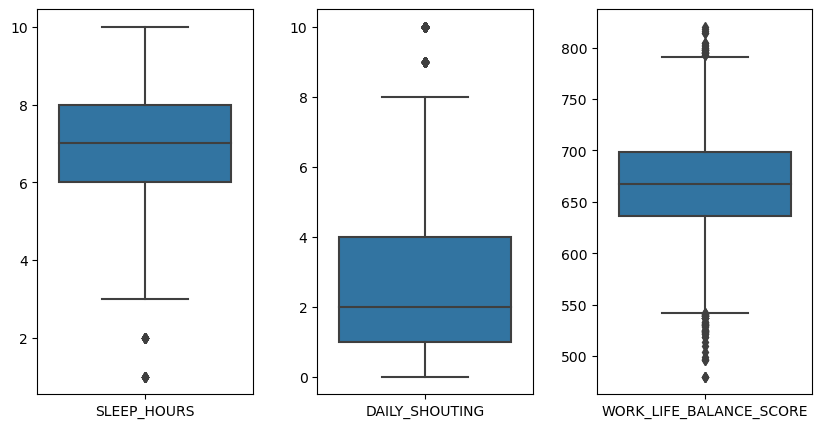

In [13]:
fig, ax = plt.subplots (figsize=(10, 5),  ncols=3)
plt.subplots_adjust(wspace = 0.3)
sns.boxplot(data = life_df[['SLEEP_HOURS']], ax = ax[0])
sns.boxplot(data = life_df[['DAILY_SHOUTING']], ax = ax[1])
sns.boxplot(data = life_df[['WORK_LIFE_BALANCE_SCORE']], ax = ax[2])

הגרפים הבאים מראה בצורה ברורה את פילוח האחוזים של העונים בסקר וניתן לראות כי האנשים אשר ישנים בין 2-4 חלקם במדגם נמוך מאוד וכי רוב האנשים נמצאים בטווח שעות השינה הממוצעות ונרחיב על נושא זה בהמשך

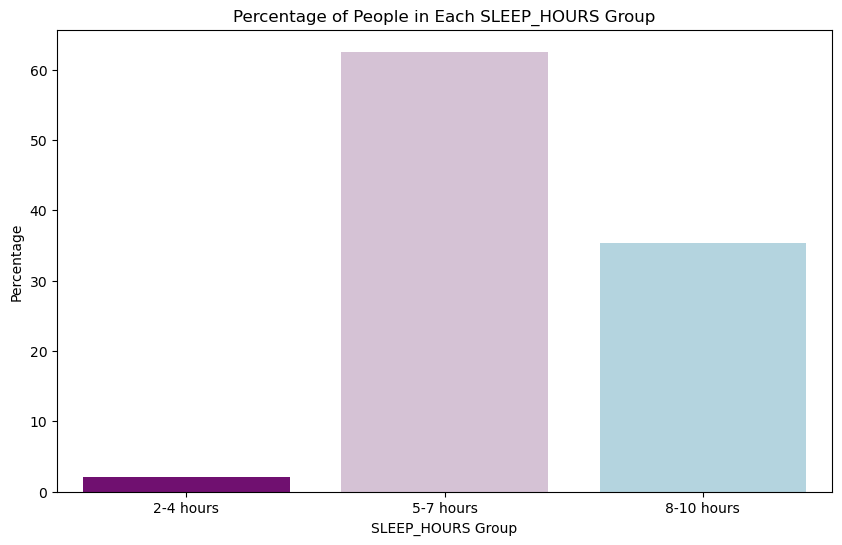

In [14]:

life_df['SLEEP_HOURS_GROUP'] = pd.cut(life_df['SLEEP_HOURS'], bins=[0, 4, 7, 10], labels=['2-4 hours', '5-7 hours', '8-10 hours'])
sleep_hours_counts = life_df['SLEEP_HOURS_GROUP'].value_counts(normalize=True) * 100
sleep_hours_counts = sleep_hours_counts.reset_index()
sleep_hours_counts.columns = ['SLEEP_HOURS_GROUP', 'Percentage']
plt.figure(figsize=(10, 6))
sns.barplot(x='SLEEP_HOURS_GROUP', y='Percentage', data=sleep_hours_counts, palette=['#800080', '#d8bfd8', '#add8e6'])
plt.title('Percentage of People in Each SLEEP_HOURS Group')
plt.xlabel('SLEEP_HOURS Group')
plt.ylabel('Percentage')
plt.show()


גרף פיזור המראה את כמות האנשים במדגם הנמצאים בכל טווח שעות השינה של המדגם 

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

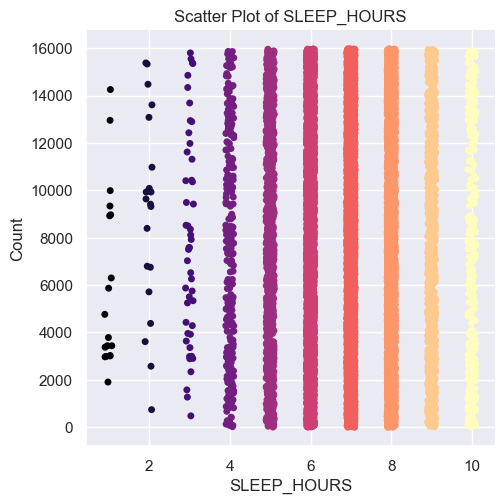

In [15]:

sns.set_theme()
plt.figure(figsize=(12, 6))
sns.catplot(
    data=life_df, x='SLEEP_HOURS', y=life_df.index,
    native_scale=True, zorder=1,
    hue='SLEEP_HOURS', palette='magma'
)

plt.title('Scatter Plot of SLEEP_HOURS')
plt.xlabel('SLEEP_HOURS')
plt.ylabel('Count')
plt.show()


---
<a id='section3'> </a>
  # $\color{navy}{\text{Initial correlation on all data}}$ 

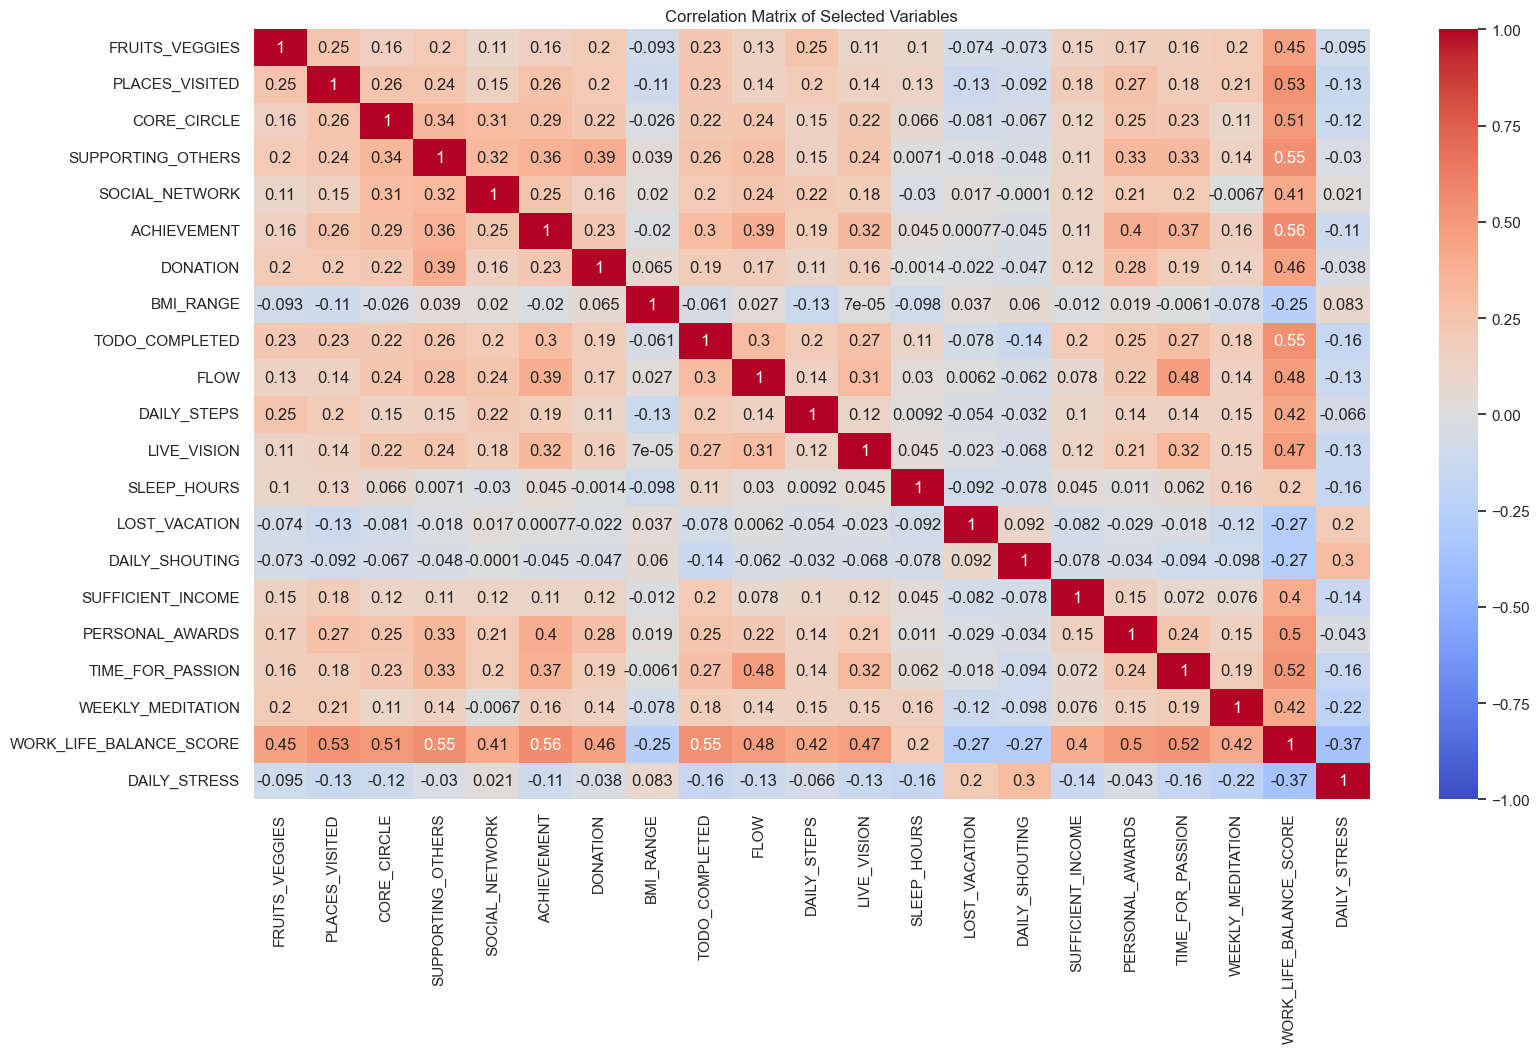

In [16]:

life_df['DAILY_STRESS'] = pd.to_numeric(life_df['DAILY_STRESS'], errors='coerce')
columns_to_correlate = ['FRUITS_VEGGIES', 'PLACES_VISITED',
                        'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
                        'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
                        'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
                        'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
                        'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE', 'DAILY_STRESS']
correlation_matrix = life_df[columns_to_correlate].corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

התחלנו לבדוק קורלציות בין ציון איזון חיים לעבודה לבין שלושה זוגות של עמודות שעל כל זוג נבחן השפעה של אותם קטגוריות על ציון איזון חיים עבודה.ניתן לראות בקורלציה כי ישנו קשר משמעותי בין הציון לעמודות אלו 

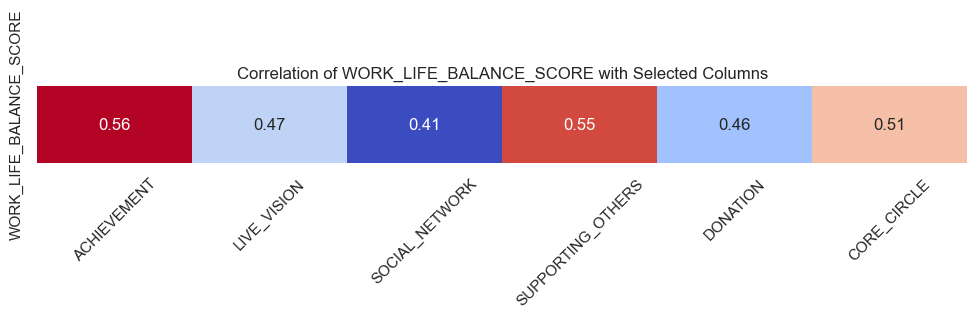

In [17]:

columns_to_correlate = ['ACHIEVEMENT', 'LIVE_VISION', 'SOCIAL_NETWORK', 'SUPPORTING_OTHERS', 'DONATION', 'CORE_CIRCLE']
correlation_matrix = life_df[['WORK_LIFE_BALANCE_SCORE'] + columns_to_correlate].corr()
wlb_corr = correlation_matrix.loc['WORK_LIFE_BALANCE_SCORE', columns_to_correlate]
plt.figure(figsize=(12, 1))
sns.heatmap(wlb_corr.to_frame().T, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.xticks(rotation=45)
plt.title('Correlation of WORK_LIFE_BALANCE_SCORE with Selected Columns')
plt.show()


---
<a id='section3'> </a>
  # $\color{navy}{\text{First Conclusion Part One}}$ 

בחרנו להתמקד בקשר בין תמיכה באחרים ואינטראקציה עם אנשים לבין איזון חיים עבודה ואנו רואים שככל שהאדם יש לו יותר אינטראקציה חברתית עם אנשים ויותר תומך באנשים אחרים האיזון שלו בין חיים לעבודה הוא יותר בריא וזה בא לידי ביטוי בציון של איזון בין חיים לעבודה  

<img src = https://raw.githubusercontent.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/main/images.jfif? raw ="true" width = "600">


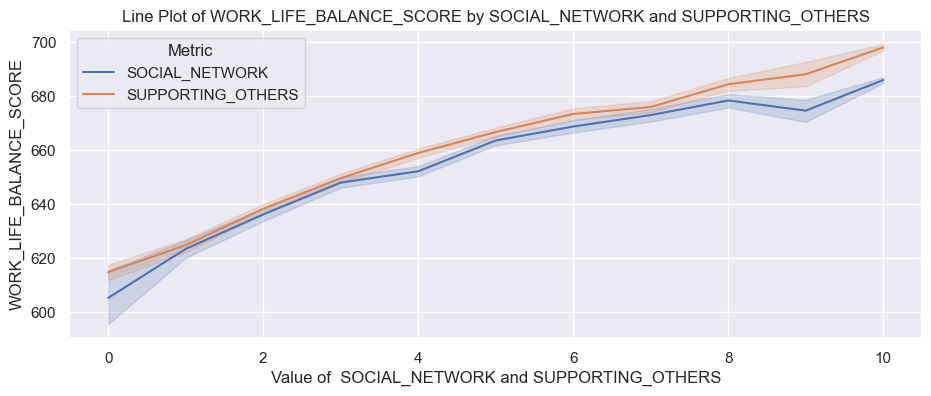

In [18]:
columns_to_plot = ['SOCIAL_NETWORK', 'SUPPORTING_OTHERS']
melted_df = life_df.melt(id_vars='WORK_LIFE_BALANCE_SCORE', value_vars=columns_to_plot, var_name='Metric', value_name='Value')
plt.figure(figsize=(11, 4))
sns.lineplot(x='Value', y='WORK_LIFE_BALANCE_SCORE', hue='Metric', data=melted_df, markers=True, dashes=False)
plt.title('Line Plot of WORK_LIFE_BALANCE_SCORE by SOCIAL_NETWORK and SUPPORTING_OTHERS')
plt.xlabel('Value of  SOCIAL_NETWORK and SUPPORTING_OTHERS')
plt.ylabel('WORK_LIFE_BALANCE_SCORE')
plt.legend(title='Metric')
plt.show()

**ניתן לראות על פי הגרף כי ככל שישנה עלייה בערכי האינטראקציה חברתית ותמיכה באחרים הציון איזון חיים-עבודה עולה בהתאם** 

**לאחר מציאת הקשר בין תמיכה באחרים,אינטראקציה חברתית לבין איזון בין חיים לעבודה נצלול פנימה ונבדוק את הקשר בין עמודות אלו לבין הגיל והמגדר .ניתן לראות בראייה ראשונית כי בממוצע לנשים נטייה לקיים אינטראקציה ברמה יותר גבוהה מגברים נמשיך להסביר זאת על ידי גרפים** 

In [19]:
life = life_df.groupby(['AGE','GENDER'])[['SOCIAL_NETWORK','SUPPORTING_OTHERS']].mean() .reset_index() 
life

,AGE,GENDER,SOCIAL_NETWORK,SUPPORTING_OTHERS
0,0 to 20,Female,7.504225,5.003756
1,0 to 20,Male,7.148541,4.194960
2,21 to 35,Female,6.360350,5.477266
3,21 to 35,Male,5.913128,4.631087
4,36 to 50,Female,6.841270,6.315772
5,36 to 50,Male,6.629280,5.609209
6,51 or more,Female,6.125273,6.655609
7,51 or more,Male,6.191083,5.896269


**הגדרנו טווחי אינטראקציות:נמוך,גבוה וממוצע וראינו שיש נטייה לנשים לקיים אינטראקציה חברתית גבוהה יותר גם ביחס לחלקם במדגם .נראה זאת בעזרת גרפים**   

In [20]:

filtered_values = life_df[life_df['SOCIAL_NETWORK'].isin([0, 1, 2, 6, 7, 10])].copy()
conditions = [
    filtered_values['SOCIAL_NETWORK'].isin([0, 1, 2]),
    filtered_values['SOCIAL_NETWORK'].isin([6, 7]),
    filtered_values['SOCIAL_NETWORK'] == 10
]
choices = ['Low (0-2)', 'Average (6-7)', 'High (10)']
filtered_values.loc[:, 'SOCIAL_NETWORK_CATEGORY'] = pd.cut(filtered_values['SOCIAL_NETWORK'], bins=[-1, 2, 7, 10], labels=choices)
distribution_by_gender = filtered_values.groupby('GENDER')['SOCIAL_NETWORK_CATEGORY'].value_counts().unstack().fillna(0)
print(distribution_by_gender)


SOCIAL_NETWORK_CATEGORY  Low (0-2)  Average (6-7)  High (10)
GENDER                                                      
Female                        1105           1366       3502
Male                           808            825       1954


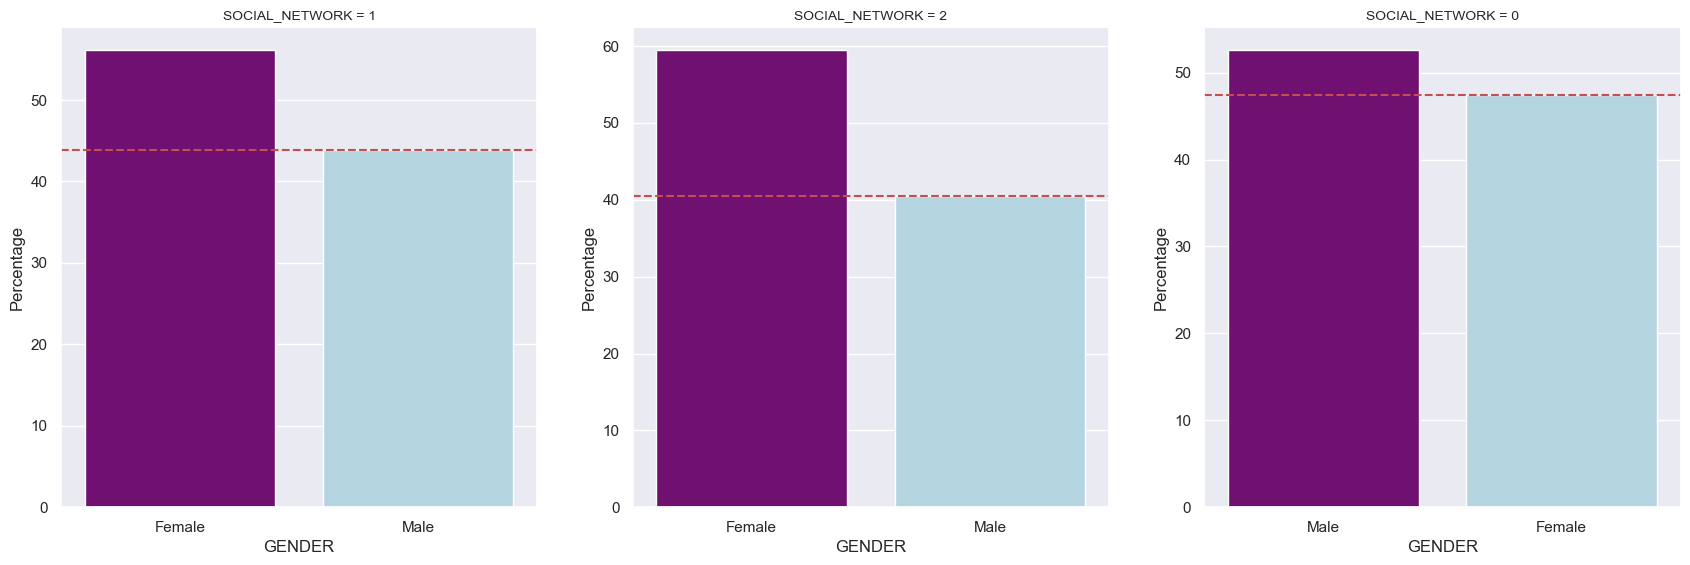

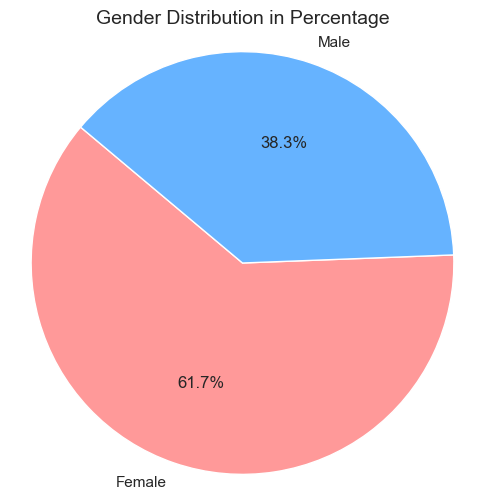

In [21]:

social_network_values = life_df['SOCIAL_NETWORK'].unique()
filtered_values = []
for value in social_network_values:
    if value not in [0, 1, 2]:
        continue
    subset = life_df[life_df['SOCIAL_NETWORK'] == value]
    gender_distribution = subset['GENDER'].value_counts(normalize=True) * 100
    filtered_values.append(value)
num_cols = 3
num_rows = (len(filtered_values) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6))
axes = axes.flatten()
small_colors = ['#800080', '#add8e6']
for ax, value in zip(axes, filtered_values):
    subset = life_df[life_df['SOCIAL_NETWORK'] == value]
    gender_distribution = subset['GENDER'].value_counts(normalize=True) * 100
    sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette=small_colors, ax=ax)
    ax.set_title(f'SOCIAL_NETWORK = {value}', fontsize=10)
    ax.set_xlabel('GENDER')
    ax.set_ylabel('Percentage')
    if 'Male' in gender_distribution.index and value != 0:
        male_percentage = gender_distribution['Male']
        ax.axhline(y=male_percentage, color='r', linestyle='--')
    if value == 0 and 'Female' in gender_distribution.index:
        female_percentage = gender_distribution['Female']
        ax.axhline(y=female_percentage, color='r', linestyle='--')
for ax in axes[len(filtered_values):]:
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.05, right=0.95, hspace=0.4, wspace=0.2)
gender_distribution = life_df['GENDER'].value_counts(normalize=True) * 100
large_colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=large_colors)
plt.title('Gender Distribution in Percentage', fontsize=14)
plt.axis('equal')  
plt.show()


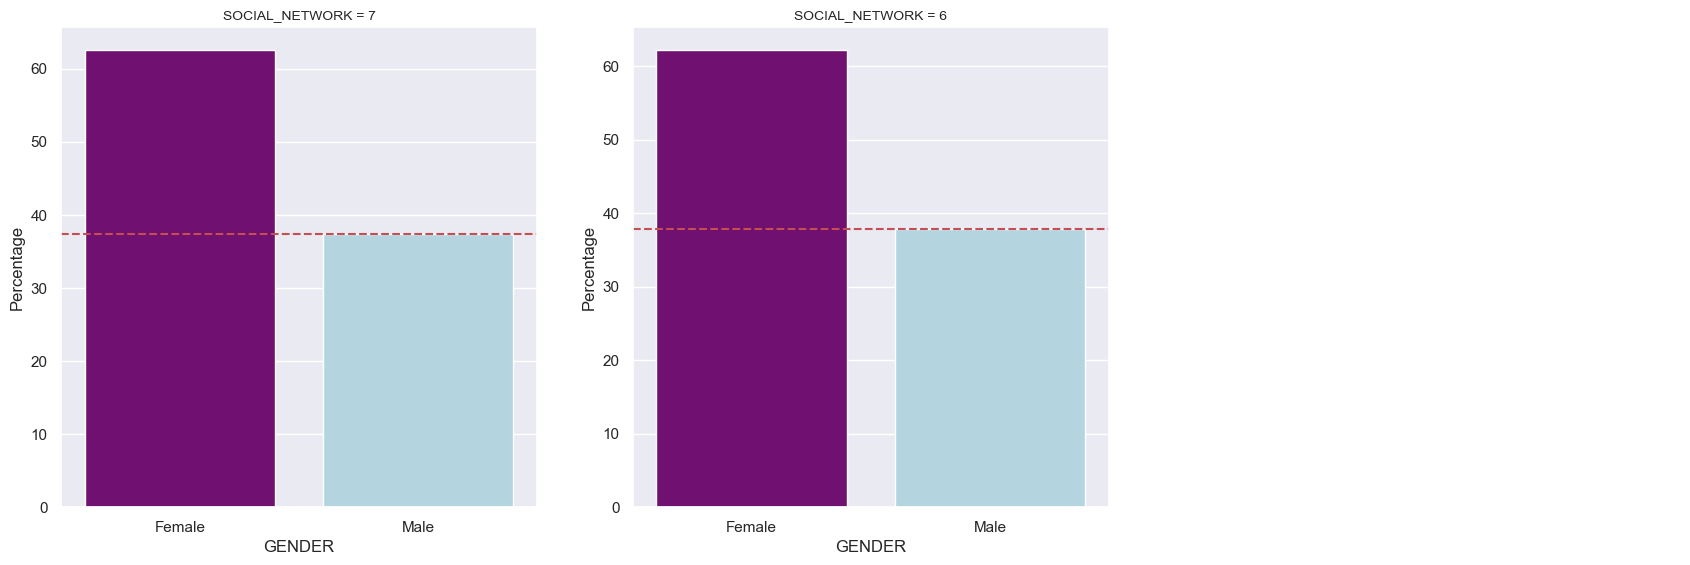

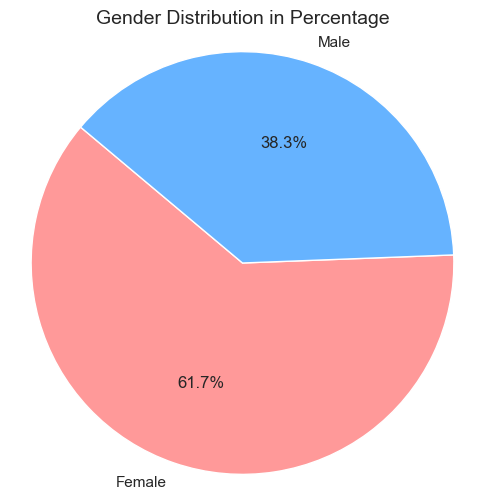

In [22]:

social_network_values = life_df['SOCIAL_NETWORK'].unique()
filtered_values = []
for value in social_network_values:
    if value not in [6, 7]:
        continue
    subset = life_df[life_df['SOCIAL_NETWORK'] == value]
    gender_distribution = subset['GENDER'].value_counts(normalize=True) * 100
    filtered_values.append(value)
num_cols = 3
num_rows = (len(filtered_values) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6))
axes = axes.flatten()
small_colors = ['#800080', '#add8e6']
for ax, value in zip(axes, filtered_values):
    subset = life_df[life_df['SOCIAL_NETWORK'] == value]
    gender_distribution = subset['GENDER'].value_counts(normalize=True) * 100
    sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette=small_colors, ax=ax)
    ax.set_title(f'SOCIAL_NETWORK = {value}', fontsize=10)
    ax.set_xlabel('GENDER')
    ax.set_ylabel('Percentage')
    if 'Male' in gender_distribution.index:
        male_percentage = gender_distribution['Male']
        ax.axhline(y=male_percentage, color='r', linestyle='--')
for ax in axes[len(filtered_values):]:
    ax.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.05, right=0.95, hspace=0.4, wspace=0.2)
gender_distribution = life_df['GENDER'].value_counts(normalize=True) * 100
large_colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=large_colors)
plt.title('Gender Distribution in Percentage', fontsize=14)
plt.axis('equal')  
plt.show()


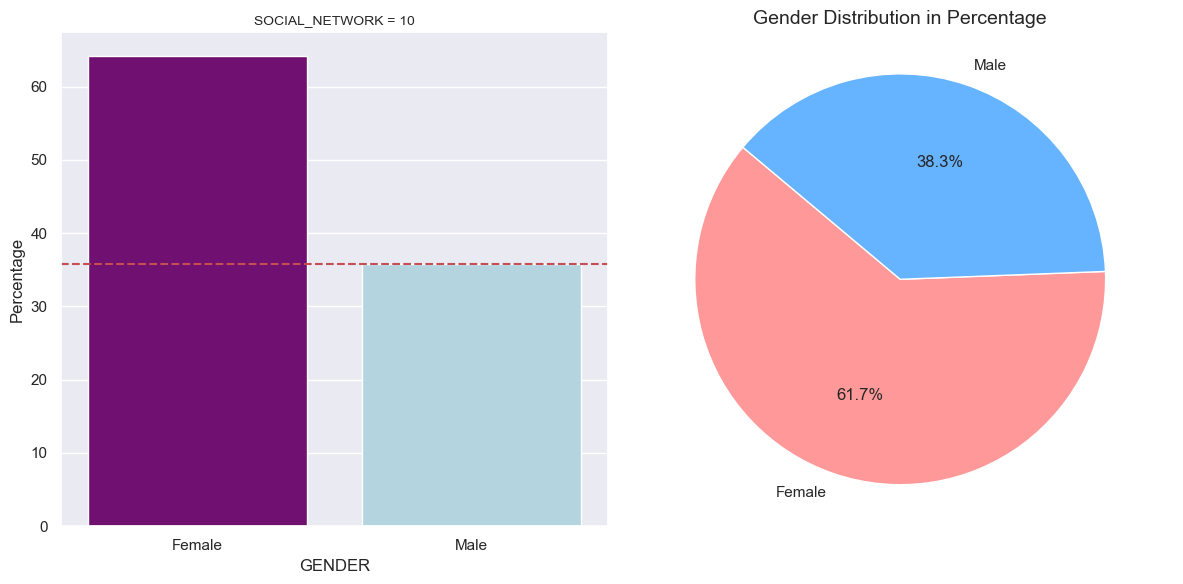

In [23]:

social_network_values = life_df['SOCIAL_NETWORK'].unique()
filtered_values = []
for value in social_network_values:
    if value != 10:
        continue
    subset = life_df[life_df['SOCIAL_NETWORK'] == value]
    gender_distribution = subset['GENDER'].value_counts(normalize=True) * 100
    filtered_values.append(value)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
small_colors = ['#800080', '#add8e6']
for ax, value in zip(axes, filtered_values):
    subset = life_df[life_df['SOCIAL_NETWORK'] == value]
    gender_distribution = subset['GENDER'].value_counts(normalize=True) * 100
    sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette=small_colors, ax=ax)
    ax.set_title(f'SOCIAL_NETWORK = {value}', fontsize=10)
    ax.set_xlabel('GENDER')
    ax.set_ylabel('Percentage')
    if 'Male' in gender_distribution.index:
        male_percentage = gender_distribution['Male']
        ax.axhline(y=male_percentage, color='r', linestyle='--')
gender_distribution = life_df['GENDER'].value_counts(normalize=True) * 100
large_colors = ['#ff9999', '#66b3ff']
axes[1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=large_colors)
axes[1].set_title('Gender Distribution in Percentage', fontsize=14)
axes[1].axis('equal')  
plt.tight_layout()
plt.show()


  **מסקנה מהגרפים: ניתן לראות על פי הגרפים כי כאשר האדם מקיים כמות אינטראקציות נמוכה הפערים בין הנשים לגברים ביחס לחלקם באוכלוסיה מצטמצמים. בנוסף ניתן לראות שאחוז הגברים ברמות אינטראקציה אלו גבוה יותר מחלקם במדגם אולם כאשר האינטראקציות ממוצעות או גבוהות ביותר ניתן להבחין במגמה הפוכה של גדילת הפער בין נשים לגברים .ניתן להסיק מכך שנשים נוטות לקיים אינטראקציות יומיות יותר מגברים**   

**המסקנות מהגרפים עוזרות לנו להסיק כי נשים נוטות לקיים יותר אינטראקציות יומיות מגברים, מה שמוביל לאיזון טוב יותר בין עבודה לחיים הפרטיים. אינטראקציות יומיות רבות מסייעות ביצירת רשתות חברתיות תומכות, המהוות גורם מרכזי באיזון בין עבודה לחיים. תמיכה באחרים מהווה מרכיב משמעותי שמשפר את תחושת הסיפוק והאיזון הכללי בין עבודה לחיים. שני הגורמים הללו יחדיו מסייעים לנשים לחוות איזון טוב יותר בין עבודה לחיים בהשוואה לגברים.**

---
<a id='section3'> </a>
  # $\color{navy}{\text{First Conclusion Second part}}$ 

ברצוננו לבדוק את השפעת הנתינה וכמות החברים הקרובים לציון איזון חיים- עבודה נבחן זאת באמצעות גרף ראשוני

<img src="https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/raw/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%20%D7%97%D7%91%D7%A8%D7%99%D7%9D.jpg" width="800">


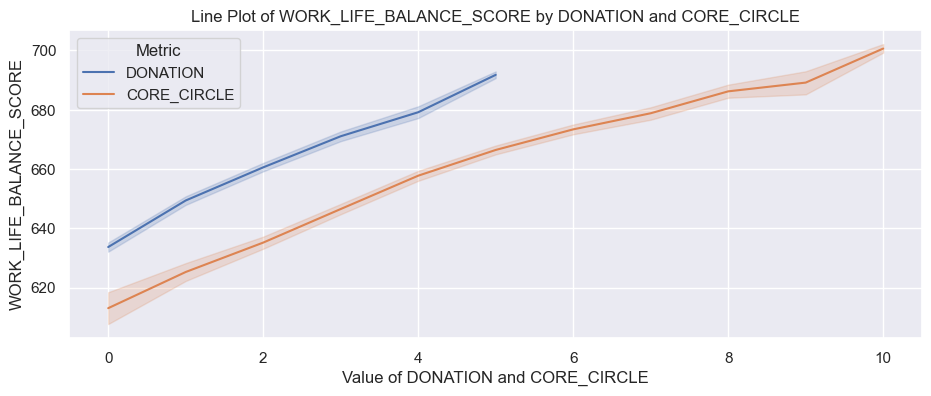

In [24]:
columns_to_plot = ['DONATION', 'CORE_CIRCLE']
melted_df = life_df.melt(id_vars='WORK_LIFE_BALANCE_SCORE', value_vars=columns_to_plot, var_name='Metric', value_name='Value')
plt.figure(figsize=(11, 4))
sns.lineplot(x='Value', y='WORK_LIFE_BALANCE_SCORE', hue='Metric', data=melted_df, markers=True, dashes=False)
plt.title('Line Plot of WORK_LIFE_BALANCE_SCORE by DONATION and CORE_CIRCLE')
plt.xlabel('Value of DONATION and CORE_CIRCLE')
plt.ylabel('WORK_LIFE_BALANCE_SCORE')
plt.legend(title='Metric')
plt.show()

**ניתן לראות מהגרף כי ישנה עלייה ברורה בציון החיים בהלימה לעלייה בכמות החברים הקרובים והתמיכה באחר**

In [25]:
life_df.groupby(['AGE'])[['DONATION']].sum()\
                                     .reset_index()\
                                     .sort_values(by='DONATION',ascending=False)

,AGE,DONATION
1,21 to 35,14492
2,36 to 50,13681
3,51 or more,11368
0,0 to 20,3828


In [26]:

column_name = 'DONATION'
if column_name in life_df.columns:
    value_counts = life_df[column_name].value_counts()
    print(f"Value counts for '{column_name}':")
    print(value_counts)


Value counts for 'DONATION':
DONATION
5    4761
1    2668
2    2533
0    2500
3    2210
4    1300
Name: count, dtype: int64


In [27]:
column_name = 'SUPPORTING_OTHERS'
if column_name in life_df.columns:
    value_counts = life_df[column_name].value_counts()
    print(f"Value counts for '{column_name}':")
    print(value_counts)

Value counts for 'SUPPORTING_OTHERS':
SUPPORTING_OTHERS
10    3994
5     1915
3     1835
4     1646
2     1576
6     1119
7     1053
8      917
1      883
0      740
9      294
Name: count, dtype: int64


**עשינו קורלציה בין תמיכה באחרים לבין נתינה ונראה כי ישנה קורלציה טובה** 

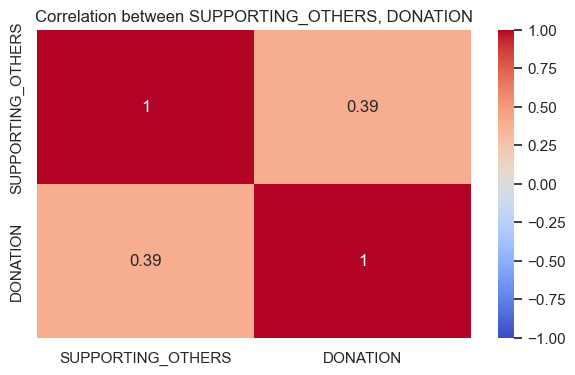

In [28]:
correlation_matrix = life_df[['SUPPORTING_OTHERS', 'DONATION']].corr()
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between SUPPORTING_OTHERS, DONATION')
plt.show()

In [29]:
life = life_df.groupby(['AGE','GENDER'])[['DONATION','SUPPORTING_OTHERS']].mean() .reset_index() 
life

,AGE,GENDER,DONATION,SUPPORTING_OTHERS
0,0 to 20,Female,2.253521,5.003756
1,0 to 20,Male,1.893899,4.194960
2,21 to 35,Female,2.538266,5.477266
3,21 to 35,Male,2.144137,4.631087
4,36 to 50,Female,3.101317,6.315772
5,36 to 50,Male,2.655254,5.609209
6,51 or more,Female,3.449149,6.655609
7,51 or more,Male,3.153776,5.896269


**ניתן לראות כי בממוצע בכל טווחי הגילאים הנתינה לאחר והתמיכה באחר יותר גבוה אצל הנשים מאשר הגברים .נראה זאת גם בעזרת גרף** 

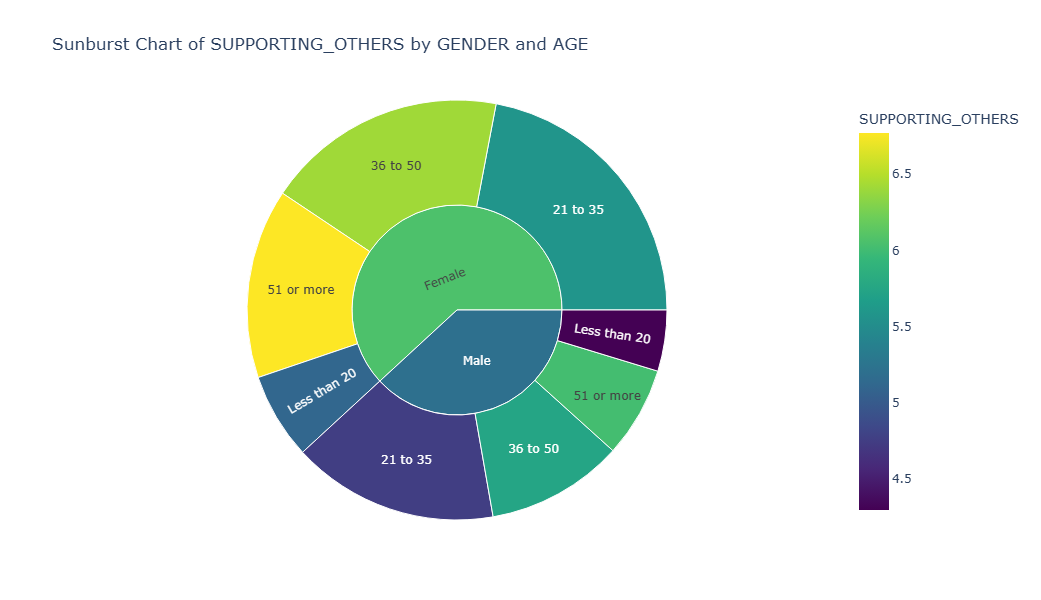

In [71]:

required_columns = ['AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE', 'SUPPORTING_OTHERS', 'DONATION']
if all(column in life_df.columns for column in required_columns):
    fig = px.sunburst(
        life_df,
        path=['GENDER', 'AGE'],
        values='WORK_LIFE_BALANCE_SCORE',
        color='SUPPORTING_OTHERS',
        color_continuous_scale='Viridis',
        title='Sunburst Chart of SUPPORTING_OTHERS by GENDER and AGE',
        width=1000,
        height=600
    )
    
    fig.write_html("sunburst_chart.html")
    fig.show()
else:
    missing_columns = [column for column in required_columns if column not in life_df.columns]
    print(f"The following columns are missing from the dataframe: {missing_columns}")


**על פי גרף זה ניתן לראות כי בכל טווח גיל בממוצע מספר האנשים בהן נשים תומכות גבוה יותר מגברים**

**ניתן לראות על פי הגרף הבא כי ככל שאתה תומך ביותר אנשים הזמן והכסף שאתה משקיע באחרים גדל בהתאמה כמו כן ניתן לראות כי הנשים נוטות יותר לתמוך באחרים וכך גם הזמן שהן משקיעות עולה בהתאם**

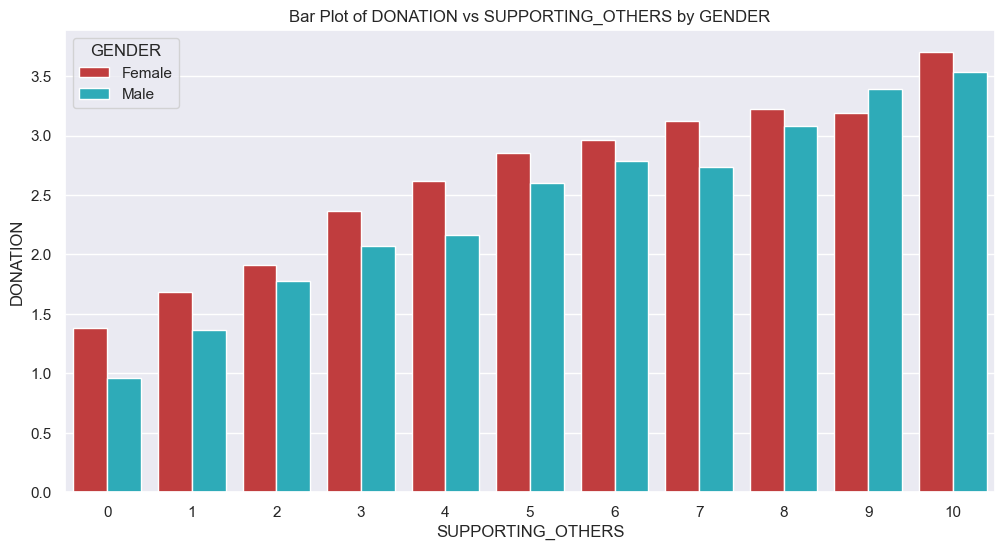

In [31]:

life_df_copy = life_df.copy()
plt.figure(figsize=(12, 6))
sns.barplot(x='SUPPORTING_OTHERS', y='DONATION', hue='GENDER', data=life_df_copy, errorbar=None, palette={'Female': '#d62728', 'Male': '#17becf'})
plt.title('Bar Plot of DONATION vs SUPPORTING_OTHERS by GENDER')
plt.xlabel('SUPPORTING_OTHERS')
plt.ylabel('DONATION')
plt.show()


In [32]:
life_df[(life_df.GENDER == 'Male') & (life_df['AGE'] == '21 to 35')]

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,SLEEP_HOURS_GROUP
11,07/12/2015,1,4.0,3,8,0,2,1,0,1,...,7,1,2,4,1,7,21 to 35,Male,618.6,5-7 hours
12,07/12/2015,2,2.0,10,5,2,8,3,4,2,...,0,0,2,5,2,7,21 to 35,Male,686.4,8-10 hours
16,07/12/2015,4,2.0,10,4,6,10,4,0,1,...,1,1,2,3,3,3,21 to 35,Male,673.5,8-10 hours
17,07/12/2015,4,2.0,10,10,5,10,0,1,1,...,0,3,2,4,8,6,21 to 35,Male,707.6,8-10 hours
20,7/13/15,2,4.0,3,8,6,5,1,2,1,...,0,3,2,3,2,5,21 to 35,Male,652.9,2-4 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15922,03/10/2021 14:15,3,4.0,3,3,1,3,1,0,1,...,10,1,2,5,0,5,21 to 35,Male,604.4,5-7 hours
15923,03/10/2021 14:57,2,4.0,2,5,2,6,3,5,2,...,10,5,2,7,0,1,21 to 35,Male,602.5,5-7 hours
15925,03/10/2021 15:18,2,2.0,3,10,5,6,8,1,1,...,3,2,2,7,3,3,21 to 35,Male,709.1,5-7 hours
15933,03/11/2021 01:58,5,3.0,7,5,5,4,4,1,1,...,7,5,2,2,1,6,21 to 35,Male,644.8,5-7 hours



 **ניתן לראות כי קיים קשר חיובי בין רמת הנתינה של אנשים לציון האיזון בין עבודה לחיים שלהם. ככל שאנשים תורמים יותר, כך ציון האיזון בין עבודה לחיים שלהם גבוה יותר. זה עשוי להצביע על כך שנתינה ותמיכה כלכלית באחרים תורמות לתחושת סיפוק ורווחה שמובילות לאיזון טוב יותר בין עבודה לחיים.כמו כן ישנו קשר חיובי בין גודל מעגל החברים הקרוב.אנשים שיש להם יותר חברים קרובים, נוטים לדווח על איזון טוב יותר בין עבודה לחיים. מכיוון שיתכן כי אנשים הנהנים מתמיכה חברתית מוגברת מרגישים תחושת יציבות וביטחון הגורמת להם לאיזון בחיים**

---
<a id='section3'> </a>
  # $\color{navy}{\text{First Conclusion third part}}$ 

**ראשית נבחן את השפעת ההישגים והראיה קדימה על ציון איזון חיים-עבודה נבחן זאת בגרף הבא** 

<img src="https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/raw/main/.jfif" width="800">


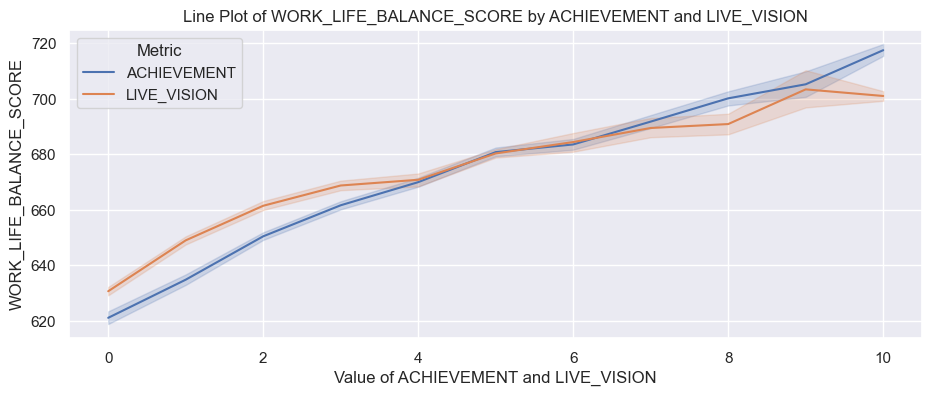

In [33]:

columns_to_plot = ['ACHIEVEMENT', 'LIVE_VISION']
melted_df = life_df.melt(id_vars='WORK_LIFE_BALANCE_SCORE', value_vars=columns_to_plot, var_name='Metric', value_name='Value')
plt.figure(figsize=(11, 4))
sns.lineplot(x='Value', y='WORK_LIFE_BALANCE_SCORE', hue='Metric', data=melted_df, markers=True, dashes=False)
plt.title('Line Plot of WORK_LIFE_BALANCE_SCORE by ACHIEVEMENT and LIVE_VISION')
plt.xlabel('Value of ACHIEVEMENT and LIVE_VISION')
plt.ylabel('WORK_LIFE_BALANCE_SCORE')
plt.legend(title='Metric')
plt.show()


**ניתן לראות על פי הגרף כי ככל שישנה עלייה בכמות ההישגים או ברמת הזמן בהם אנשים מתכננים קדימה כך עולה  ציון איזון בין חיים לעבודה** 

In [34]:
life_df["ACHIEVEMENT"].unique()

array([ 2,  5,  3,  4,  0,  1,  6, 10,  8,  7,  9], dtype=int64)

In [35]:
life_df["LIVE_VISION"].unique()

array([ 0,  5, 10,  4,  2,  1,  6,  3,  8,  9,  7], dtype=int64)

In [36]:
life_df.groupby(['AGE'])[['ACHIEVEMENT']].mean()

,ACHIEVEMENT
AGE,
0 to 20,4.241891
21 to 35,3.842829
36 to 50,4.054565
51 or more,4.082006


**ניתן לראות שבממוצע טווח הגילאים 21-35 זהו טווח בו מצליחים להשיג פחות הישגים**

In [37]:
life_df.groupby(['AGE'])[['LIVE_VISION']].mean()

,LIVE_VISION
AGE,
0 to 20,3.959318
21 to 35,3.504093
36 to 50,3.684425
51 or more,4.180826


**נראה שבטווח הגילאים 51 ומעלה אנשים נוטים יותר לראות קדימה** 

**ניסינו לבדוק האם קיימים אנשים במדגם אשר הפער בין כמות ההשגים שלהם לבין הזמן שהם מתכננים קדימה ומצאנו כי ישנו אחוז נמוך של אנשים כאלו**

In [38]:
complex_filtered_df = life_df.loc[(life_df['ACHIEVEMENT'] > 8) & (life_df['LIVE_VISION'] < 2 ), ['ACHIEVEMENT', 'LIVE_VISION']]
print(complex_filtered_df)


       ACHIEVEMENT  LIVE_VISION
64              10            1
129             10            0
246             10            1
260             10            1
381             10            0
...            ...          ...
15718           10            1
15846           10            1
15867           10            0
15901           10            1
15946           10            1

[199 rows x 2 columns]


In [39]:
total_rows = 15972
filtered_rows = 199

percentage = (filtered_rows / total_rows) * 100
percentage

1.2459303781617832

**ניסינו לבדוק האם קיימים אנשים במדגם אשר הפער בניהם הוא המקסימלי ביותר ובנוסף מאיזה מגדר הם ומצאנו כי אכן קיימים אנשים כאלו** 

In [40]:
difference_series = life_df['ACHIEVEMENT'] - life_df['LIVE_VISION']
max_difference_index = difference_series.idxmax()
min_difference_index = difference_series.idxmin()
max_difference_row = life_df.loc[max_difference_index, ['ACHIEVEMENT', 'LIVE_VISION', 'GENDER']]
min_difference_row = life_df.loc[min_difference_index, ['ACHIEVEMENT', 'LIVE_VISION', 'GENDER']]
max_difference_value = difference_series[max_difference_index]
min_difference_value = difference_series[min_difference_index]
print("Row with the maximum difference:")
print(max_difference_row)
print("\nRow with the minimum difference:")
print(min_difference_row)
gender_counts = life_df.loc[[max_difference_index, min_difference_index], 'GENDER'].value_counts()
print("\nGender distribution among the rows with maximum and minimum differences:")
print(gender_counts)


Row with the maximum difference:
ACHIEVEMENT      10
LIVE_VISION       0
GENDER         Male
Name: 129, dtype: object

Row with the minimum difference:
ACHIEVEMENT         0
LIVE_VISION        10
GENDER         Female
Name: 116, dtype: object

Gender distribution among the rows with maximum and minimum differences:
GENDER
Male      1
Female    1
Name: count, dtype: int64


**מצאנו כי קיימים שני אנשים סהכ אחד גבר ואחד אישה אשר הפער בניהם הוא הפער הגדול ביותר בין ההישגים לראייה קדימה. ניתן להסביר זאת בכך שאנשים אלו עשויים להיות ממוקדים באופן קיצוני במטרות והמשימות הנוכחיות שלהם, ולא להשקיע זמן או מאמץ כלל לתכנון עתידי. הם מגיעים לאותם הישגים גבוהים בזכות המיקוד שלהם במשימות הנוכחיות, אך לא חושבים או מתכננים לטווח הארוך** 

**זרימה :מצב בו אדם מתמסר לחלוטין לפעולה שהוא מבצע, לרוב עם תחושת התמקדות עמוקה סיפוק והנאה - מה שקורה בעצם זה שהכל הולך לו** 

**ננסה למצוא קשר בין זרימה לבין הישגים של האדם . נבחן זאת בגרף הבא**

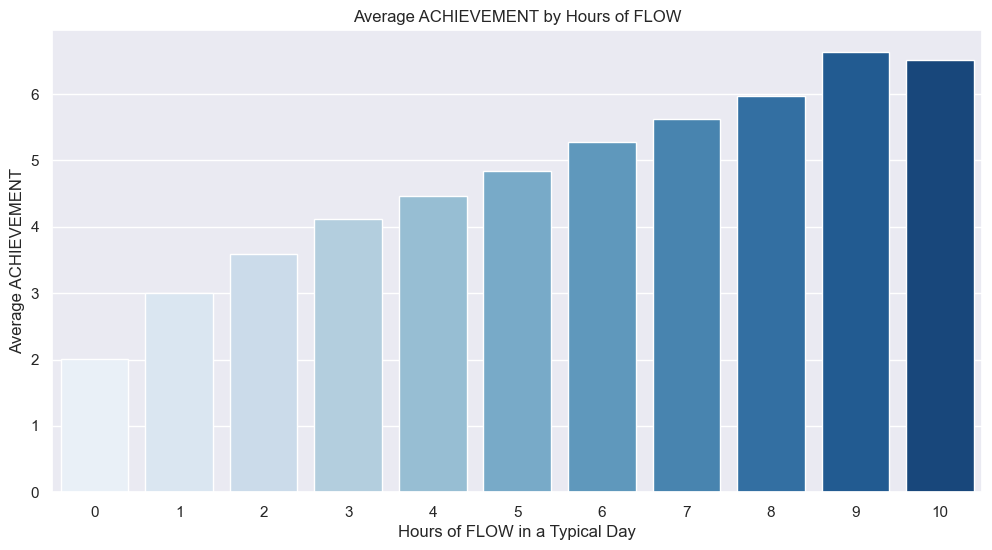

In [41]:

flow_achievement_mean = life_df.groupby('FLOW')['ACHIEVEMENT'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='FLOW', y='ACHIEVEMENT', data=flow_achievement_mean, palette='Blues')
plt.title('Average ACHIEVEMENT by Hours of FLOW')
plt.xlabel('Hours of FLOW in a Typical Day')
plt.ylabel('Average ACHIEVEMENT')
plt.show()


**מהגרף עולה כי קיים קשר חיובי ברור בין מספר שעות הזרימה ביום טיפוסי לבין רמת ההישגים. כלומר, ככל שמספר השעות שבהן אנשים חווים זרימה עולה, כך ממוצע ההישגים שלהם גדל**

**ננסה למצוא קשר בין זרימה לבין ראייה קדימה של האדם . נבחן זאת בגרף הבא**

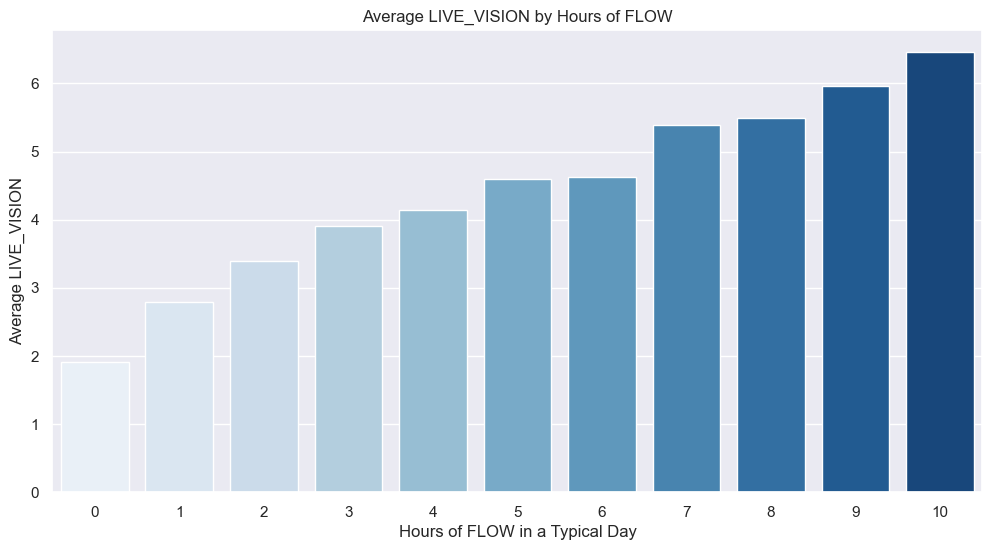

In [42]:

flow_live_vision_mean = life_df.groupby('FLOW')['LIVE_VISION'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='FLOW', y='LIVE_VISION', data=flow_live_vision_mean, palette='Blues')
plt.title('Average LIVE_VISION by Hours of FLOW')
plt.xlabel('Hours of FLOW in a Typical Day')
plt.ylabel('Average LIVE_VISION')
plt.show()



**ניתן לראות כי קיים קשר חיובי בין רמת הנתינה של אנשים לציון האיזון בין עבודה לחיים שלהם. ככל שאנשים תורמים יותר, כך ציון האיזון בין עבודה לחיים שלהם גבוה יותר. זה עשוי להצביע על כך שנתינה ותמיכה כלכלית באחרים תורמות לתחושת סיפוק ורווחה שמובילות לאיזון טוב יותר בין עבודה לחיים.כמו כן ישנו קשר חיובי בין גודל מעגל החברים הקרוב.אנשים שיש להם יותר חברים קרובים, נוטים לדווח על איזון טוב יותר בין עבודה לחיים. מכיוון שיתכן כי אנשים הנהנים מתמיכה חברתית מוגברת מרגישים תחושת יציבות וביטחון הגורמת להם לאיזון בחיים
מהגרף ניתן לראות שיש קשר חיובי בין מספר השעות בהן אנשים חווים זרימה ביום טיפוסי לבין ממוצע החזון שלהם ככל שמספר השעות בהן אנשים חווים זרימה עולה, כך עולה גם ממוצע הזמן בו אנשים רואים קדימה את חזון החיים שלהם**


**ישנו קשר חיובי בין מספר ההישגים לבין ציון האיזון בין עבודה לחיים. ככל שאנשים מדווחים על יותר הישגים, הציון הממוצע של האיזון בין עבודה לחיים שלהם גבוה יותר. זה מצביע על כך שאנשים שמצליחים להשיג יותר בחייהם נוטים לחוות איזון טוב יותר בין עבודה לחיים. בנוסף ישנו קשר חיובי בין ראייה קדימה לציון האיזון בין עבודה לחיים. אנשים עם ראייה קדימה יותר ברורה ומכוונת, נוטים לדווח על איזון טוב יותר בין עבודה לחיים.**

## מסקנת סיכום:ניתן לראות כי בכל אחד מזוגות מהערכים הבאים:1.הישגים וראייה למרחוק 2.חברים קרובים ונתינה מעצמך 3. אינטראקציה חברתית ותמיכה באחרים  ישנו קשר חשוב לציון איזון חיים משפחה .כמו כן ניתן לראות כי מדובר בדברים חיוביים וכי דברים אלו משפיעים על איזון האדם בחייו ונותנים לו אפשרות להשיג יותר ולהצליח יותר ולהיות לצד משפחתו וחבריו ולתמוך בהם 

---
<a id='section3'> </a>
  # $\color{navy}{\text{Second conclusion}}$ 

<img src="https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/blob/main/163429_tumb_800X480.jpg%D7%A4%D7%99%D7%A8%D7%95%D7%AA%201.jpg?raw=true" width="800">

?**כמה פירות וירקות אתה צורך ביום? ומי צורך יותר מבוגרים או ילדים? גברים או נשים? ואיך צריכת ירקות ופירות משפיעות על מספר הצעדים היומי שלך**  

In [43]:
gender_counts = life_df['GENDER'].value_counts()
print(f"מספר הנשים: {gender_counts['Female']}")
print(f"מספר הגברים: {gender_counts['Male']}")

מספר הנשים: 9858
מספר הגברים: 6114


**גרף עוגה של מספר נשים וגברים במחקר**

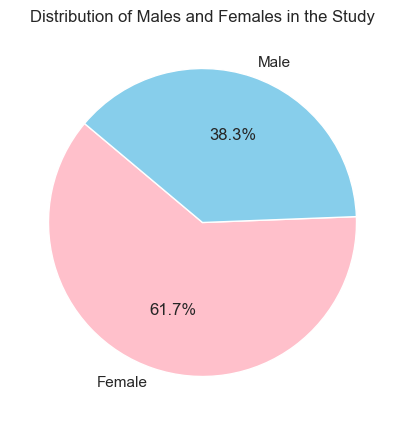

In [44]:

gender_counts = life_df['GENDER'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'])
plt.title('Distribution of Males and Females in the Study')
plt.show()

 ?**כמה גברים אוכלים פירות וירקות וכמה נשים אוכלות**

In [45]:

num_females_fruits = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'] > 0)].shape[0]
num_males_fruits = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'] > 0)].shape[0]
print("מספר הנשים שאכלו פירות וירקות:", num_females_fruits)
print("מספר הגברים שאכלו פירות וירקות:", num_males_fruits)

מספר הנשים שאכלו פירות וירקות: 9602
מספר הגברים שאכלו פירות וירקות: 5818


**פילוח לפי שכבות גיל באוכלוסיה בקרב גברים שכן אוכלים פירות וירקות**

In [46]:

age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
male_fruits_by_age = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'] > 0)]\
    .groupby('AGE').size().reset_index(name='COUNT')
male_fruits_by_age['AGE'] = pd.Categorical(male_fruits_by_age['AGE'], categories=age_order, ordered=True)
male_fruits_by_age = male_fruits_by_age.sort_values('AGE').reset_index(drop=True)
print(male_fruits_by_age)

          AGE  COUNT
0    21 to 35   2411
1    36 to 50   1630
2  51 or more   1079
3         NaN    698


**פילוח לפי שכבות גיל באוכלוסיה בקרב נשים שכן אוכלות פירות וירקות**

In [47]:
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
female_fruits_by_age = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'] > 0)]\
    .groupby('AGE').size().reset_index(name='COUNT')
female_fruits_by_age['AGE'] = pd.Categorical(female_fruits_by_age['AGE'], categories=age_order, ordered=True)
female_fruits_by_age = female_fruits_by_age.sort_values('AGE').reset_index(drop=True)
print(female_fruits_by_age)

          AGE  COUNT
0    21 to 35   3424
1    36 to 50   2906
2  51 or more   2252
3         NaN   1020


**ניתן לראות שהשכבת גיל שצורכת הכי הרבה פירות וירקות בקרב גברים ונשים היא 21-35**

<img src="https://raw.githubusercontent.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/main/%D7%A8%D7%99%D7%A6%D7%94images%20(1).jfif" width="800">

**סכום הצעדים הכולל של כל המשתתפים במחקר**

In [48]:
total_daily_steps = life_df['DAILY_STEPS'].sum()
total_daily_steps

91098

 **כמה מתוכם נשים וכמה גברים**

In [49]:
total_female_steps_all = life_df[life_df['GENDER'] == 'Female']['DAILY_STEPS'].sum()
total_male_steps_all = life_df[life_df['GENDER'] == 'Male']['DAILY_STEPS'].sum()
print("מספר צעדים שצעדו נשים:")
print(total_female_steps_all)
print("מספר צעדים שצעדו גברים:")
print(total_male_steps_all)

מספר צעדים שצעדו נשים:
55381
מספר צעדים שצעדו גברים:
35717


**כמה מתוכם אלו נשים וגברים שצורכים פירות וירקות**

In [50]:

total_female_steps_fruits = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'] > 0)]['DAILY_STEPS'].sum()
total_male_steps_fruits = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'] > 0)]['DAILY_STEPS'].sum()
print("סכום הצעדים היומיים של נשים שאכלו פירות וירקות:", total_female_steps_fruits)
print("סכום הצעדים היומיים של גברים שאכלו פירות וירקות:", total_male_steps_fruits)

סכום הצעדים היומיים של נשים שאכלו פירות וירקות: 54333
סכום הצעדים היומיים של גברים שאכלו פירות וירקות: 34477


**פילוח לפי גיל של כמות הצעדים היומית של גברים**

In [51]:

age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
male_steps_by_age = life_df[life_df['GENDER'] == 'Male'].groupby('AGE')[['DAILY_STEPS']].sum().reset_index()
male_steps_by_age['AGE'] = pd.Categorical(male_steps_by_age['AGE'], categories=age_order, ordered=True)
male_steps_by_age = male_steps_by_age.sort_values('AGE').reset_index(drop=True)
print(male_steps_by_age)

          AGE  DAILY_STEPS
0    21 to 35        14687
1    36 to 50        10068
2  51 or more         6347
3         NaN         4615


**גרף צירים של פילוח לפי גיל כמות צעדים יומית גברים**

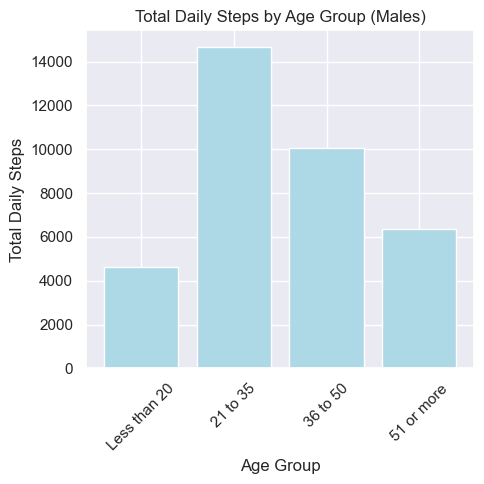

In [52]:

age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
data = {
    'AGE': ['Less than 20', '21 to 35', '36 to 50', '51 or more'],
    'DAILY_STEPS': [4615, 14687, 10068, 6347]  
}

male_steps_by_age = pd.DataFrame(data)
male_steps_by_age['AGE'] = pd.Categorical(male_steps_by_age['AGE'], categories=age_order, ordered=True)
male_steps_by_age = male_steps_by_age.sort_values('AGE').reset_index(drop=True)
plt.figure(figsize=(5, 5))
bars = plt.bar(male_steps_by_age['AGE'], male_steps_by_age['DAILY_STEPS'], color='lightblue')
plt.xlabel('Age Group')
plt.ylabel('Total Daily Steps')
plt.title('Total Daily Steps by Age Group (Males)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:

age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
male_steps_by_age = life_df[life_df['GENDER'] == 'Male'].groupby('AGE')[['DAILY_STEPS']].sum().reset_index()
male_steps_by_age['AGE'] = pd.Categorical(male_steps_by_age['AGE'], categories=age_order, ordered=True)
male_steps_by_age = male_steps_by_age.sort_values('AGE').reset_index(drop=True)
print(male_steps_by_age)

          AGE  DAILY_STEPS
0    21 to 35        14687
1    36 to 50        10068
2  51 or more         6347
3         NaN         4615


**פילוח לפי גיל של כמות צעדים יומית בקרב נשים**

In [54]:
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
female_steps_by_age = life_df[life_df['GENDER'] == 'Female'].groupby('AGE')[['DAILY_STEPS']].sum().reset_index()
female_steps_by_age['AGE'] = pd.Categorical(female_steps_by_age['AGE'], categories=age_order, ordered=True)
female_steps_by_age = female_steps_by_age.sort_values('AGE').reset_index(drop=True)
print(female_steps_by_age)

          AGE  DAILY_STEPS
0    21 to 35        19482
1    36 to 50        16796
2  51 or more        12820
3         NaN         6283


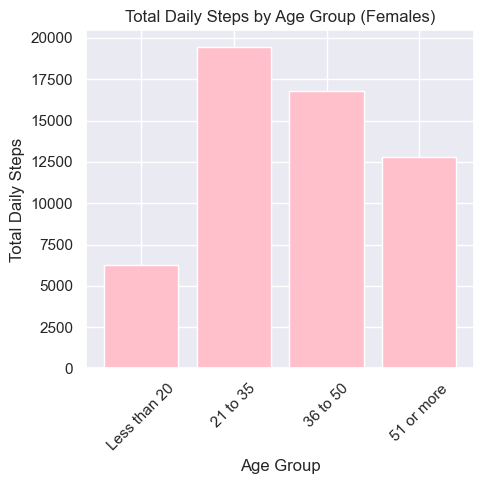

In [55]:

age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
data = {
    'AGE': ['Less than 20', '21 to 35', '36 to 50', '51 or more'],
    'DAILY_STEPS': [6283, 19482, 16796, 12820] 
}

female_steps_by_age = pd.DataFrame(data)
female_steps_by_age['AGE'] = pd.Categorical(female_steps_by_age['AGE'], categories=age_order, ordered=True)
female_steps_by_age = female_steps_by_age.sort_values('AGE').reset_index(drop=True)
plt.figure(figsize=(5, 5))
bars = plt.bar(female_steps_by_age['AGE'], female_steps_by_age['DAILY_STEPS'], color='pink')
plt.xlabel('Age Group')
plt.ylabel('Total Daily Steps')
plt.title('Total Daily Steps by Age Group (Females)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**ניתן לראות גם פה שהאוכלוסיה שהולכת הכי הרבה היא 21-35**

**פילוח לפי שכבות גיל באוכלוסיה של כמות צעדים יומית בקרב גבר**

In [56]:

age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
male_steps_fruits_by_age = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'] > 0)].groupby('AGE')[['DAILY_STEPS']].sum().reset_index()
male_steps_fruits_by_age['AGE'] = pd.Categorical(male_steps_fruits_by_age['AGE'], categories=age_order, ordered=True)
male_steps_fruits_by_age = male_steps_fruits_by_age.sort_values('AGE').reset_index(drop=True)
print(male_steps_fruits_by_age)

          AGE  DAILY_STEPS
0    21 to 35        14082
1    36 to 50         9796
2  51 or more         6245
3         NaN         4354


**פילוח לפי שכבות גיל באוכלוסיה של כמות צעדים יומית בקרב נשים שכן אוכלות פירות וירקות**

In [57]:
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
female_steps_fruits_by_age = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'] > 0)].groupby('AGE')[['DAILY_STEPS']].sum().reset_index()
female_steps_fruits_by_age['AGE'] = pd.Categorical(female_steps_fruits_by_age['AGE'], categories=age_order, ordered=True)
female_steps_fruits_by_age = female_steps_fruits_by_age.sort_values('AGE').reset_index(drop=True)
print(female_steps_fruits_by_age)

          AGE  DAILY_STEPS
0    21 to 35        19020
1    36 to 50        16584
2  51 or more        12671
3         NaN         6058


**ניתן לשים לב כי מתוך 9858 גברים שהשתתפו במחקר 9602 גברים אוכלים פירות הדבר מעיד על יחס מאוד קטן**

**ולכן המדגם לא מספק ויש צורך לצלול יותר פנימה ולבדוק את כמות הצעדים של אלו שאוכלים 0-2 ירקות ביום לעומת אלו שאוכלים3-5**

In [58]:

age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
male_steps_0_2_fruits_by_age = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'].between(0, 2))]\
    .groupby('AGE').agg({'DAILY_STEPS': 'sum', 'GENDER': 'count'}).reset_index().rename(columns={'GENDER': 'COUNT'})
male_steps_0_2_fruits_by_age['AGE'] = pd.Categorical(male_steps_0_2_fruits_by_age['AGE'], categories=age_order, ordered=True)
male_steps_0_2_fruits_by_age = male_steps_0_2_fruits_by_age.sort_values('AGE').reset_index(drop=True)
male_steps_3_5_fruits_by_age = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'].between(3, 5))]\
    .groupby('AGE').agg({'DAILY_STEPS': 'sum', 'GENDER': 'count'}).reset_index().rename(columns={'GENDER': 'COUNT'})
male_steps_3_5_fruits_by_age['AGE'] = pd.Categorical(male_steps_3_5_fruits_by_age['AGE'], categories=age_order, ordered=True)
male_steps_3_5_fruits_by_age = male_steps_3_5_fruits_by_age.sort_values('AGE').reset_index(drop=True)
print(" גברים שאכלו 0 עד 2 פירות וירקות:")
print(male_steps_0_2_fruits_by_age)
print("\nגברים שאכלו 3 עד 5 פירות וירקות:")
print(male_steps_3_5_fruits_by_age)

 גברים שאכלו 0 עד 2 פירות וירקות:
          AGE  DAILY_STEPS  COUNT
0    21 to 35         7041   1366
1    36 to 50         3841    750
2  51 or more         1920    383
3         NaN         2136    383

גברים שאכלו 3 עד 5 פירות וירקות:
          AGE  DAILY_STEPS  COUNT
0    21 to 35         7646   1201
1    36 to 50         6227    944
2  51 or more         4427    716
3         NaN         2479    371



עכשיו בקרב נשים

In [59]:
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
female_steps_0_2_fruits_by_age = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'].between(0, 2))]\
    .groupby('AGE').agg({'DAILY_STEPS': 'sum', 'GENDER': 'count'}).reset_index().rename(columns={'GENDER': 'COUNT'})
female_steps_0_2_fruits_by_age['AGE'] = pd.Categorical(female_steps_0_2_fruits_by_age['AGE'], categories=age_order, ordered=True)
female_steps_0_2_fruits_by_age = female_steps_0_2_fruits_by_age.sort_values('AGE').reset_index(drop=True)
female_steps_3_5_fruits_by_age = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'].between(3, 5))]\
    .groupby('AGE').agg({'DAILY_STEPS': 'sum', 'GENDER': 'count'}).reset_index().rename(columns={'GENDER': 'COUNT'})
female_steps_3_5_fruits_by_age['AGE'] = pd.Categorical(female_steps_3_5_fruits_by_age['AGE'], categories=age_order, ordered=True)
female_steps_3_5_fruits_by_age = female_steps_3_5_fruits_by_age.sort_values('AGE').reset_index(drop=True)
print("נשים שאכלו 0 עד 2 פירות וירקות :")
print(female_steps_0_2_fruits_by_age)
print("\nנשים שאכלו 3 עד 5 פירות וירקות:")
print(female_steps_3_5_fruits_by_age)

נשים שאכלו 0 עד 2 פירות וירקות :
          AGE  DAILY_STEPS  COUNT
0    21 to 35         7164   1519
1    36 to 50         5019   1056
2  51 or more         2624    593
3         NaN         2567    493

נשים שאכלו 3 עד 5 פירות וירקות:
          AGE  DAILY_STEPS  COUNT
0    21 to 35        12318   2022
1    36 to 50        11777   1905
2  51 or more        10196   1698
3         NaN         3716    572


גרף מסכם

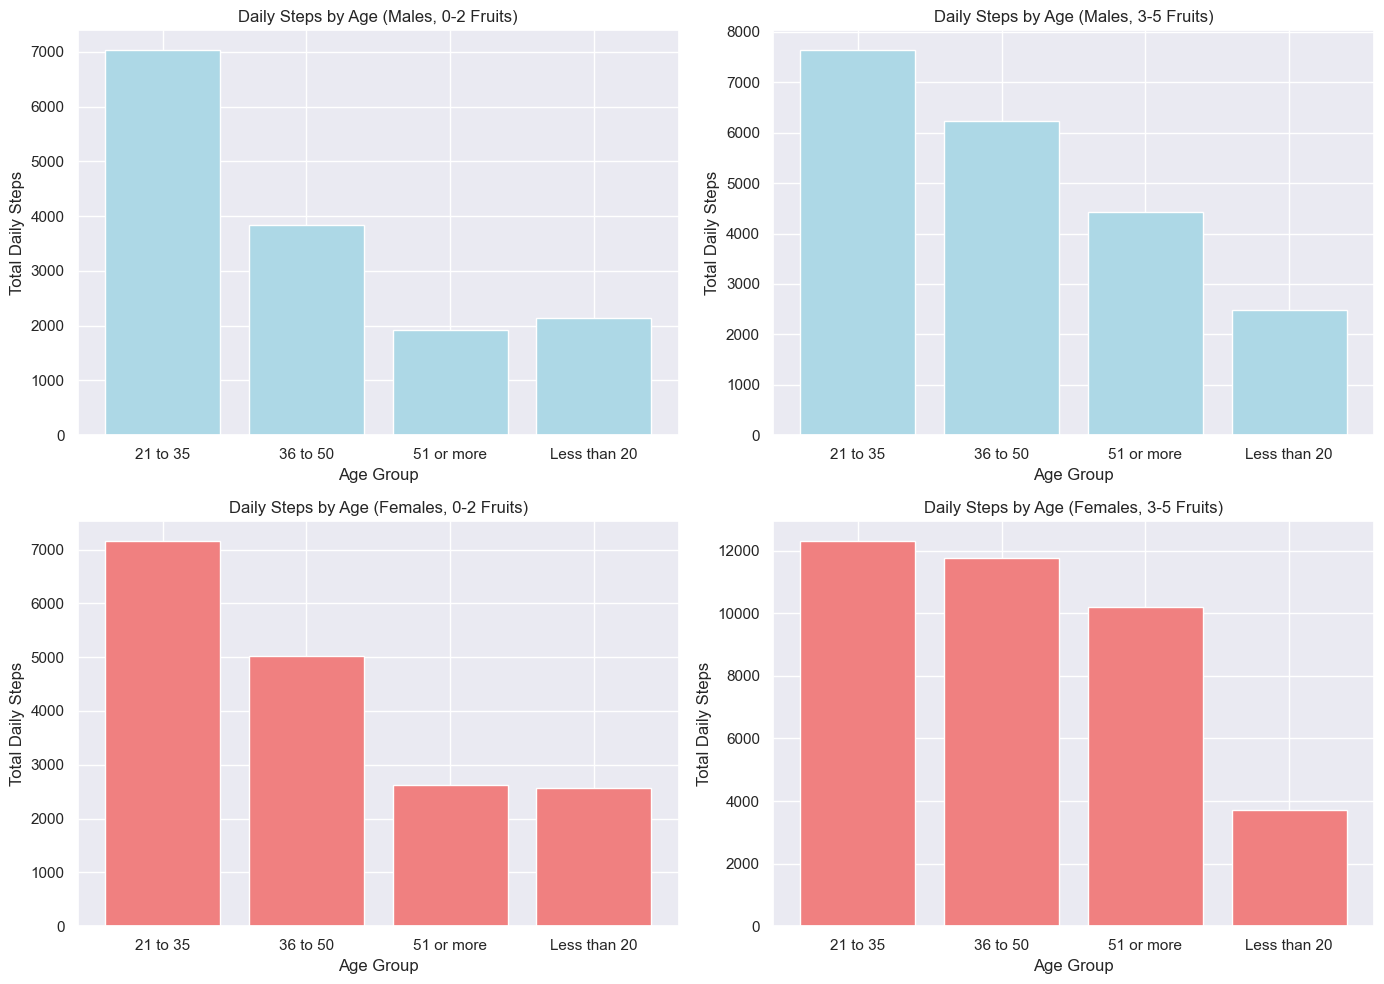

In [60]:

age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
male_steps_0_2_fruits_by_age['AGE'] = pd.Categorical(male_steps_0_2_fruits_by_age['AGE'], categories=age_order, ordered=True).fillna('Less than 20')
male_steps_3_5_fruits_by_age['AGE'] = pd.Categorical(male_steps_3_5_fruits_by_age['AGE'], categories=age_order, ordered=True).fillna('Less than 20')
female_steps_0_2_fruits_by_age['AGE'] = pd.Categorical(female_steps_0_2_fruits_by_age['AGE'], categories=age_order, ordered=True).fillna('Less than 20')
female_steps_3_5_fruits_by_age['AGE'] = pd.Categorical(female_steps_3_5_fruits_by_age['AGE'], categories=age_order, ordered=True).fillna('Less than 20')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
male_color = 'lightblue'
female_color = 'lightcoral'
axes[0, 0].bar(male_steps_0_2_fruits_by_age['AGE'], male_steps_0_2_fruits_by_age['DAILY_STEPS'], color=male_color)
axes[0, 0].set_title('Daily Steps by Age (Males, 0-2 Fruits)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Total Daily Steps')
axes[0, 1].bar(male_steps_3_5_fruits_by_age['AGE'], male_steps_3_5_fruits_by_age['DAILY_STEPS'], color=male_color)
axes[0, 1].set_title('Daily Steps by Age (Males, 3-5 Fruits)')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Total Daily Steps')
axes[1, 0].bar(female_steps_0_2_fruits_by_age['AGE'], female_steps_0_2_fruits_by_age['DAILY_STEPS'], color=female_color)
axes[1, 0].set_title('Daily Steps by Age (Females, 0-2 Fruits)')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Total Daily Steps')
axes[1, 1].bar(female_steps_3_5_fruits_by_age['AGE'], female_steps_3_5_fruits_by_age['DAILY_STEPS'], color=female_color)
axes[1, 1].set_title('Daily Steps by Age (Females, 3-5 Fruits)')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Total Daily Steps')
plt.tight_layout()
plt.show()


## מסקנה: הממצאים מצביעים על כך שייתכן שקיים יחס חיובי בין כמות הפירות והירקות שנאכלו לבין כמות הצעדים היומית. עם זאת, כדי להסיק מסקנות חד משמעיות, נדרשים ניתוחים סטטיסטיים נוספים ואימות של הממצאים על ידי ניתוחים מתקדמים נוספים.

---
<a id='section3'> </a>
  # $\color{navy}{\text{Third conclusion}}$ 

<img src='https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/blob/main/%D7%A9%D7%99%D7%A0%D7%94-%D7%98%D7%95%D7%91%D7%94-scaled.jpg?raw=true' width='800'/>

**כעת אנו מעוניינים לבדוק ולחקור את השפעת הרגלי השינה של עוני הסקר על תחומי החיים שלהם**
**נבחן את עמודות שעות השינה למול מספר עמודות אחרות וננסה להסביר זאת על פי הדאטה**

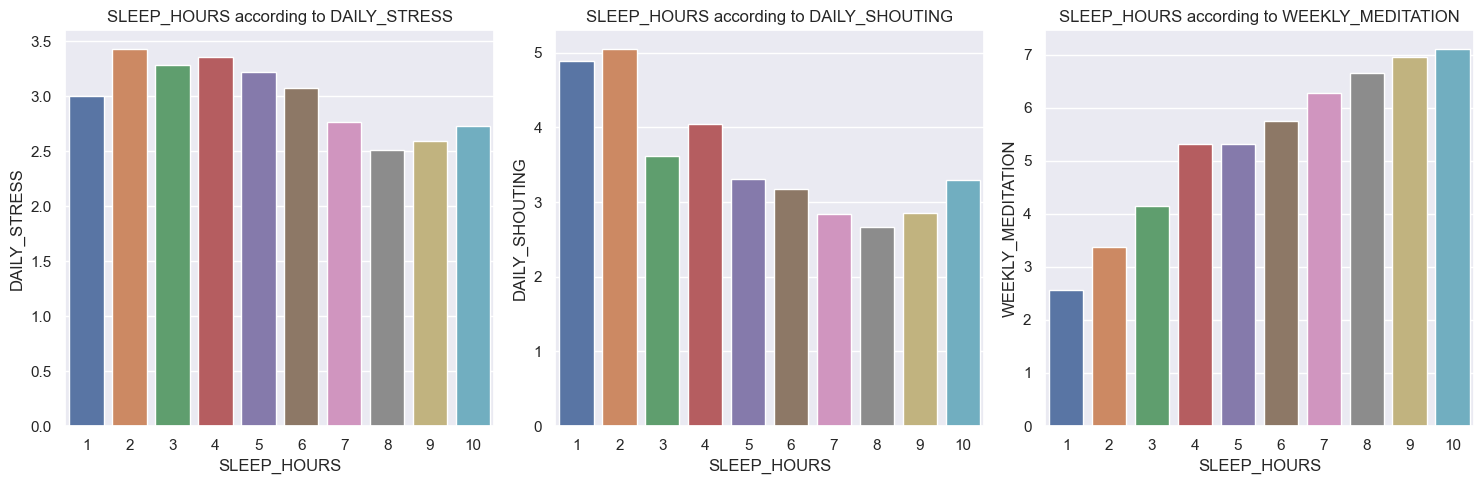

In [61]:

relevant_columns = ['SLEEP_HOURS', 'DAILY_STRESS', 'DAILY_SHOUTING', 'WEEKLY_MEDITATION']
life_df[relevant_columns] = life_df[relevant_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'))
plt.figure(figsize=(15, 5))
for i, column in enumerate(relevant_columns[1:]):  
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='SLEEP_HOURS', y=column, data=life_df, errorbar=None)
    plt.title(f'SLEEP_HOURS according to {column}')
    plt.xlabel('SLEEP_HOURS')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


**מכיוון שבאופן הגיוני ברור כי שעת שינה אחת או אפילו 2 או 3 שעות אינן מספיקות לאדם ממוצע נסווג לפי הנתונים של הדאטה את מספר העונים בסקר לפי טווח הגילאים שלהם ולפי מספר שעות השינה שלהם**

In [62]:

bins = [0, 3, 8, 10]
labels = ['1-3 hours', '4-8 hours', '9-10 hours']
life_df['SLEEP_CATEGORY'] = pd.cut(life_df['SLEEP_HOURS'], bins=bins, labels=labels)
sleep_age_count = life_df.groupby(['SLEEP_CATEGORY']).size().reset_index(name='The number of respondents:')
print(sleep_age_count)

  SLEEP_CATEGORY  The number of respondents:
0      1-3 hours                          88
1      4-8 hours                       14564
2     9-10 hours                        1320


**לפי הטבלה ניתן להבחין כי באופן הגיוני- מעט מאוד אנשים ישנים בין 1-3 שעות וכי מספרם זניח לגמי לעומת האנשים שישנים 4 שעות ויותר**

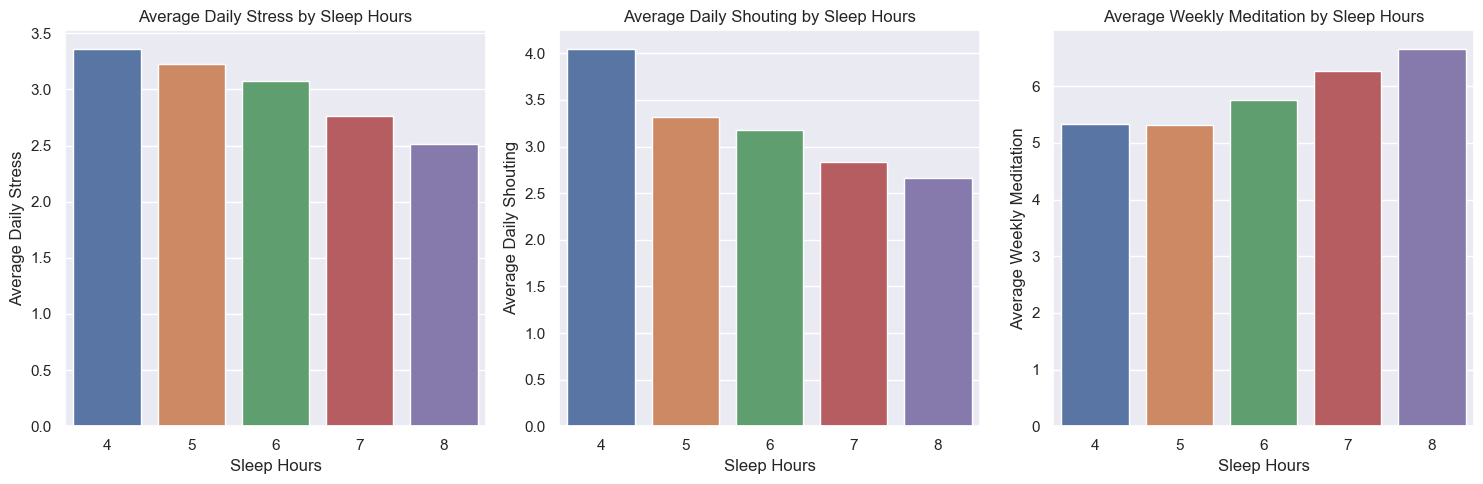

In [63]:

filtered_data = life_df[(life_df['SLEEP_HOURS'] >= 4) & (life_df['SLEEP_HOURS'] <= 8)].copy()
filtered_data.loc[:, 'DAILY_STRESS'] = pd.to_numeric(filtered_data['DAILY_STRESS'], errors='coerce')
filtered_data.loc[:, 'DAILY_SHOUTING'] = pd.to_numeric(filtered_data['DAILY_SHOUTING'], errors='coerce')
filtered_data.loc[:, 'WEEKLY_MEDITATION'] = pd.to_numeric(filtered_data['WEEKLY_MEDITATION'], errors='coerce')
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='SLEEP_HOURS', y='DAILY_STRESS', data=filtered_data, estimator=pd.Series.mean, errorbar=None)
plt.title('Average Daily Stress by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Daily Stress')
plt.subplot(1, 3, 2)
sns.barplot(x='SLEEP_HOURS', y='DAILY_SHOUTING', data=filtered_data, estimator=pd.Series.mean, errorbar=None)
plt.title('Average Daily Shouting by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Daily Shouting')
plt.subplot(1, 3, 3)
sns.barplot(x='SLEEP_HOURS', y='WEEKLY_MEDITATION', data=filtered_data, estimator=pd.Series.mean, errorbar=None)
plt.title('Average Weekly Meditation by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Weekly Meditation')
plt.tight_layout()
plt.show()

 **עוד ניתן להסיק כי מספר שעות השינה הממוצע של עוני הסקר הוא 4-8 שעות שינה ולכן נעדיף להתמקד בהם בשלב זה**

**כעת ניתן להסיק מספר מסקנות ביניים:
ככל שאדם ישן יותר כך רמת הלחץ שלו יורדת וזאת בהתאם לגרף הראשון.
עוד ניתן להסיק כי ככל שאדם ישן יותר רמת הצעקות היומית שלו יורדת משמעותית מ4 ל3 ביום.
עוד ניתן להסיק לאור הגרף השלישי כי ככל שהאדם ישן יותר כך הוא פנוי לעשות מדיטציה ולחשוב עם עצמו כיצד להשתפר.
לכן ניתן לומר כי מהגרפים למעלה עולה כי ככל שאדם ישן בלילה מספר שעות מספק- הדבר בבירור ישפיע לטובה על התפקוד שלו במהלך היום.**

**כעת אנו מעוניינים לחזור ולנתח את האנשים שלפי הסקר ישנים מספר שעות הגבוה מ8 ולנתח את רמת הלחץ שלהם**

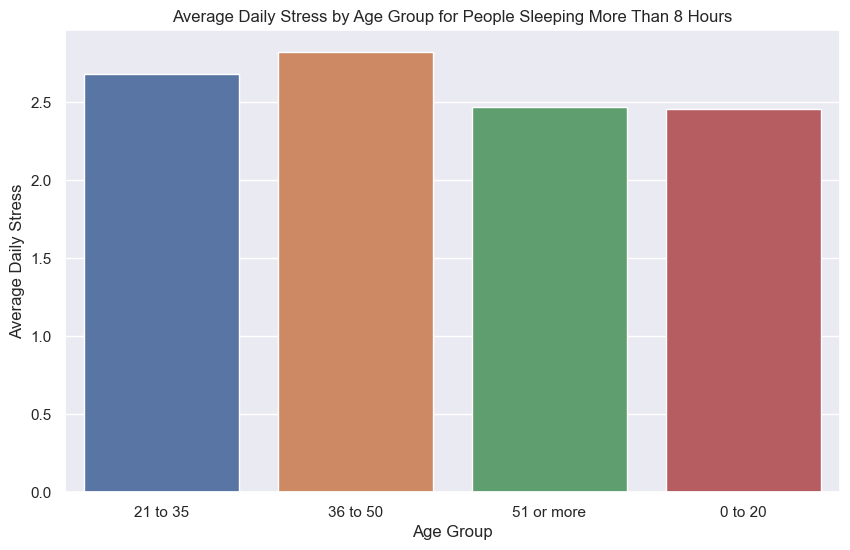

In [64]:

filtered_data = life_df[life_df['SLEEP_HOURS'] > 8].copy()
filtered_data.loc[:, 'DAILY_STRESS'] = pd.to_numeric(filtered_data['DAILY_STRESS'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.barplot(x='AGE', y='DAILY_STRESS', data=filtered_data, estimator=pd.Series.mean, errorbar=None)
plt.title('Average Daily Stress by Age Group for People Sleeping More Than 8 Hours')
plt.xlabel('Age Group')
plt.ylabel('Average Daily Stress')
plt.show()

**כאשר נסווג את רמות הלחץ של אנשים שישנים מעל 8 שעותלפי קבוצות גיל-ניתן לראות כי קבוצת הגיל שמתחת ל20 וקבוצת הגיל שמעל 51 נמצאים בתוך רמת  הלחץ הממוצעת של אנשים שישנו 8 שעות שהיא 2.5 (רמת הלחץ כאמור הינה דבר לא מדיד, עוני הסקר נדרשו לסווג את רמת הלחץ שלהם בטווח שבין 1-5).
ניתן לשער כי רמת הלחץ הגבוהה במעט מן הממוצע של קבוצות הגיל האמצעיות 21-35 ו36-50 בכך שאותן קבוצות גיל נמצאות בשיא החיים שלהן. הזוגיות, העבודה והקריירה, הילדים משפיעים יותר על רמת הלחץ באופן טבעי וזאת לדעתנו הסיבה לעלייה הקטנה מן הממוצע ברמת הלחץ של שכבות גיל אלו**.

<img src='https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/blob/main/stress(3)(1).jpg?raw=true' width='800'/>

**כעת נעבור לנתח את מספר הצעקות היומי של אנשים שישנו מעל 8 שעות לפי קבוצות הגיל. כאמור המשיבים בסקר התבקשו למלא באופן יחסי את מספר הצעקות או הכעסים שהם מכוונים כלפי הסביבה שלהם באופן יום-יומי בטווח שבין 1-10.**

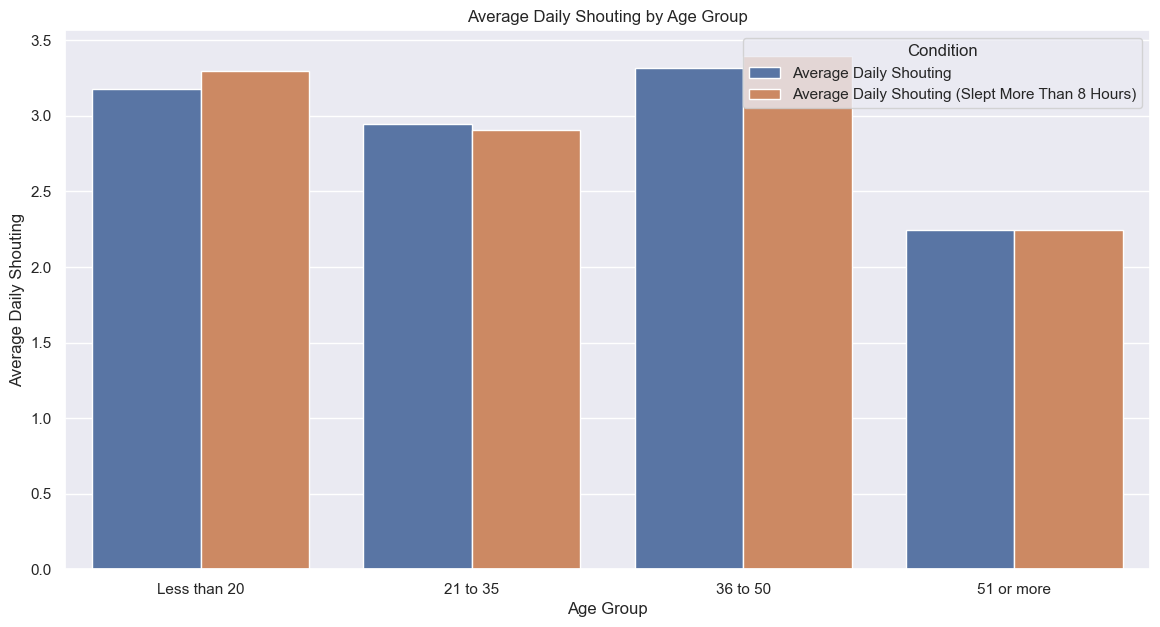

In [65]:

life_df = pd.read_csv(url)
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
age_shouting_mean = life_df.groupby('AGE')['DAILY_SHOUTING'].mean().reindex(age_order)
sleep_filtered_data = life_df[life_df['SLEEP_HOURS'] > 8]
sleep_shouting_mean = sleep_filtered_data.groupby('AGE')['DAILY_SHOUTING'].mean().reindex(age_order)
combined_df = pd.DataFrame({
    'Age Group': age_order,
    'Average Daily Shouting': age_shouting_mean.values,
    'Average Daily Shouting (Slept More Than 8 Hours)': sleep_shouting_mean.values
})

combined_df_melted = pd.melt(combined_df, id_vars=['Age Group'], value_vars=['Average Daily Shouting', 'Average Daily Shouting (Slept More Than 8 Hours)'], var_name='Condition', value_name='Average Shouting')
plt.figure(figsize=(14, 7))
sns.barplot(x='Age Group', y='Average Shouting', hue='Condition', data=combined_df_melted)
plt.title('Average Daily Shouting by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Daily Shouting')
plt.show()

**מתוך השוואה שערכנו בין רמת הצעקות של אנשים שישנו יותר מ8 לבין רמת הצעקות הכללית בסווג לפי קבוצות גיל עולה כי אין פערים משמעותיים וכי אנשים שישנו יותר אינם צועקים יותר בממוצע לפי שכבת גילם.**

<img src='https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/blob/main/77140900100791980551no.jpg?raw=true' width='800'/>

**כעת אחרי שראינו את השפעות שעות השינה על רמת הלחץ, כעס וזמני מדיטציה בהמלך היום, נרצה לבחון את רמת השפעת שעות השינה על בריאותו הפיזית של הגוף שמבוטאת בדאטה כעמודת BMI
המשיבים בסקר התבקשו למלא את הערכים של מסת גופם בטווח של 1-2 ולכן אנו נבחן את השינויים בדיוק מירבי לאחר הנקודה.**

             BMI_RANGE
SLEEP_HOURS           
4             1.523810
5             1.521951
6             1.474536
7             1.392921
8             1.361008


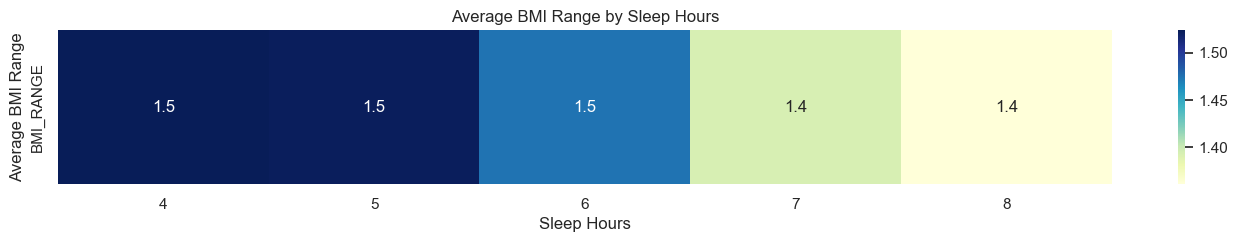

In [66]:

filtered_data = life_df.loc[(life_df['SLEEP_HOURS'] >= 4) & (life_df['SLEEP_HOURS'] <= 8)].copy()
pivot_table = filtered_data.pivot_table(values='BMI_RANGE', index='SLEEP_HOURS', aggfunc='mean')
print(pivot_table)
plt.figure(figsize=(17, 2))
sns.heatmap(pivot_table.T, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Average BMI Range by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average BMI Range')
plt.show()

**נשים לב כי באופן ברור אדם שישן 4 שעות בממוצע ללילה טווח המסה שלו בקרב העונים על הסקר גדול יותר מאדם שישן 8 שעות. ולכן ניתן להסיק שבקרב העונים על הסקר אנשים שישנים יותר שעות בממוצע נמצאים בטווח תקין יותר מבחינת המסת גוף שלהם דבר שמשפיע על בריאותם הפיזית**

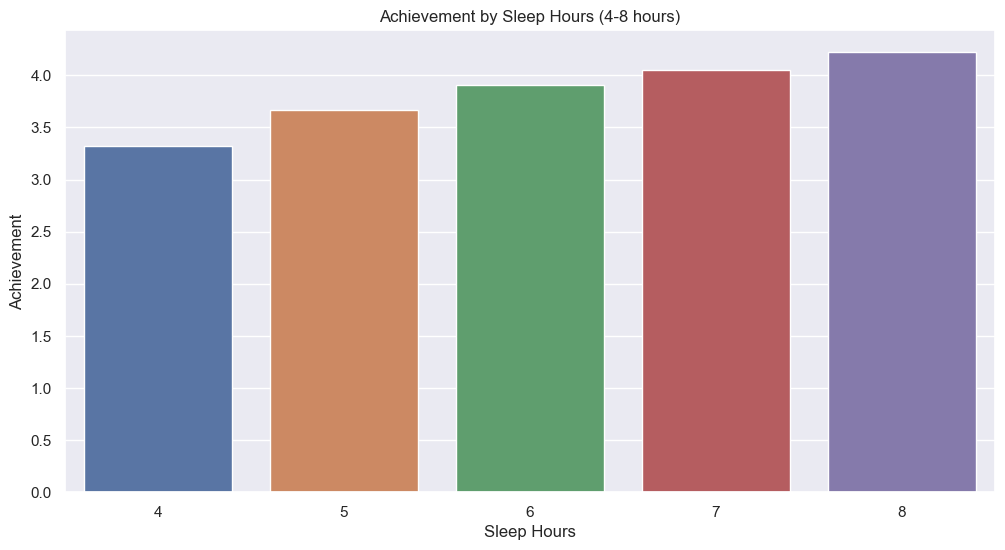

In [67]:

filtered_data = life_df[(life_df['SLEEP_HOURS'] >= 4) & (life_df['SLEEP_HOURS'] <= 8)].copy()
filtered_data['ACHIEVEMENT'] = pd.to_numeric(filtered_data['ACHIEVEMENT'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.barplot(x='SLEEP_HOURS', y='ACHIEVEMENT', data=filtered_data, estimator=pd.Series.mean, errorbar=None)
plt.title('Achievement by Sleep Hours (4-8 hours)')
plt.xlabel('Sleep Hours')
plt.ylabel('Achievement')
plt.show()

**עוד ניתן לראות שאדם חווה תחושת הישג גדולה יותר כאשר הוא ישן מספר שעות גבוה יותר.**

<img src='https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/blob/main/images.jpg?raw=true' width='800'/>

**מניתוח הנתונים עולה כי לשינה מספקת (בין 4-8 שעות בלילה) יש השפעה חיובית רבה על רמות הסטרס, תחושת ההישג, רמת הצעקות והכעס היומית וזמן המדיטציה השבועי. 
עוד עלה במהלך המחקר כי יתכן שקבוצות הגיל האמצעיות מ21-50 נוטות להיות בלחץ גבוה מן הממוצע על אף שישנו מספיק וזאת מכיוון שזהו שיא חייהם והלחץ בשנים הללו גבוה מן הממוצע בעקבות כך.
לסיכום: שינה מספקת היא מרכיב חיוני לבריאות ולשמירה על גוף האדם בכל גיל, לשמירה על מערכות יחסים תקינות עם הסובבים אותו, ואף לביצועים טובים יותר.
בעקבות המחקר נמליץ כי חשוב להקפיד על שעות שינה מסודרות ומספקות כחלק מאורח חיים בריא ומאוזן** 

**<h2>Thanks for listening</h2>**